In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec
import spectral_analysis as sa

# Max-No dm15 Match

In [3]:
%matplotlib inline

In [4]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [64]:
comps_host_max, sn_arrays_host_max, og_sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
['-12 SELECT', '123.png.dat', '17.000000', '53.000000', '596RF Multi-plots.py', 'add_maguire_data.py', 'add_ryan_hst_data.py', 'add_ryan_hst_data.pyc', 'add_swift_uv_data.py', 'add_swift_uv_data.pyc', 'Andres_Telluric.ipynb', 'badfiles.txt', 'bootstrap.py', 'build_event_table.py', 'build_event_table.pyc', 'build_kaepora.py', 'build_phot_db', 'build_phot_db.py', 'build_phot_db.pyc', 'build_spectral_table.py', 'build_spectral_table.pyc', 'Carbon_EW.ipynb', 'check.py', 'checked_csp_0-11', 'checked_other_0-0', 'checked_other_0-7', 'checkUI.py', 'Color_dm15.ipynb', 'composite plot.png', 'composite.py', 'composite.pyc', 'composite_conflicts.py', 'createdb.py', 'cross_correlate.py', 'database_revisions.txt', 'datafidelity.py', 'datafidelity.pyc', 'data_notes.txt', 'data_notes_csp_other.txt', 'db_maintenance.py', 'db_maintenance.pyc', 'debug_failed_spectr

composite.py:1215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1252: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


KeyboardInterrupt: 

In [6]:
dmlate = []
dmearly = []
for s in sn_arrays_host_max[0]:
    dmlate.append(np.nanmean(s.dm15_array))
for s in sn_arrays_host_max[1]:
    dmearly.append(np.nanmean(s.dm15_array))
print np.average(dmlate), np.average(dmearly)

1.09776143037 1.47312882951


Phase:  0.297864602844
dm15:  1.09226591033
Redshift:  0.0129290910405
Morphology:  12.5901458103
Phase:  0.0436236985333
dm15:  1.3746852981
Redshift:  0.0120101524127
Morphology:  5.2103955279


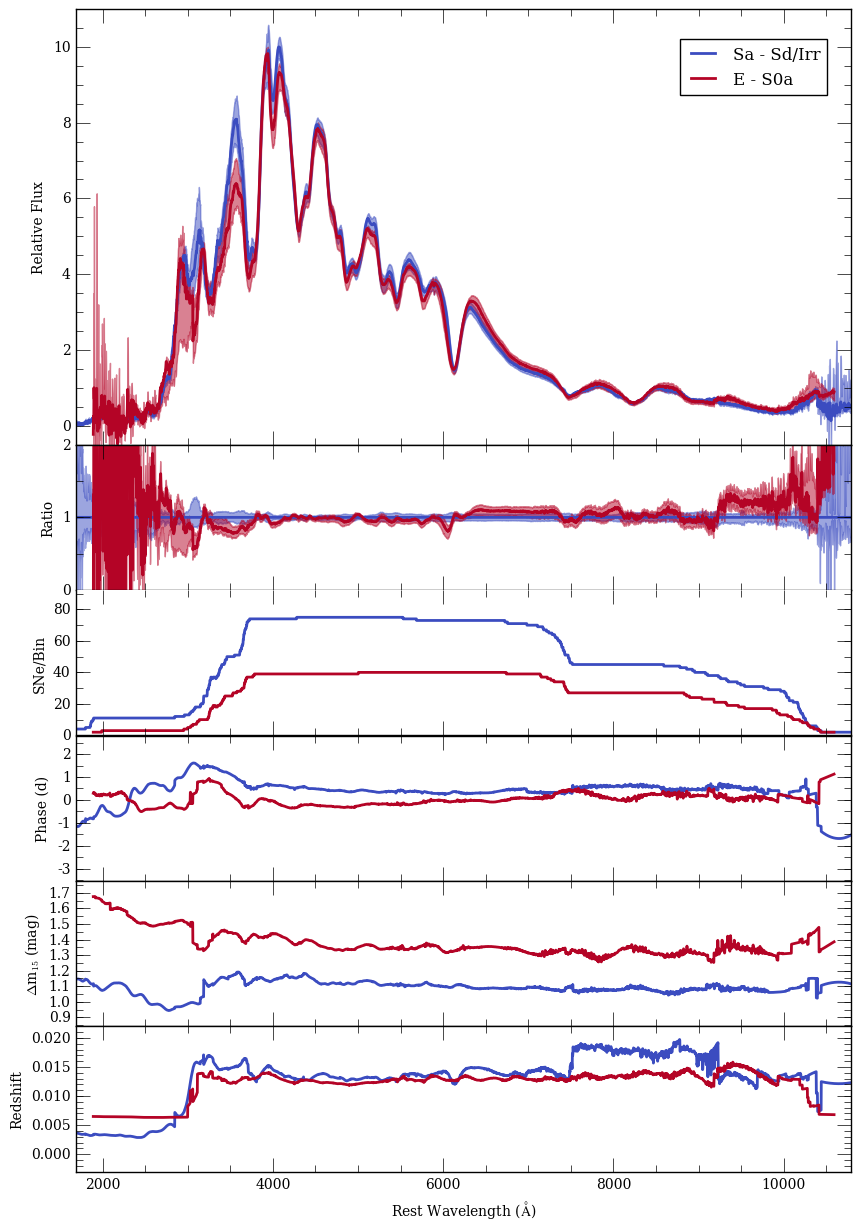

In [7]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Mid dm15 Matched

In [3]:
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]
query_host_match_p0 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'",
                       "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [9]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_match_p0, sn_arrays_match_p0, boot_sn_arrays_match_p0 = query_db.main(len(query_host_match_p0), query_host_match_p0, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'
74 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 70, 'spectra left')
(0, 'Peculiar Ias removed', 70, 'spectra left')
57 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
16 total SNe
removed SNe without host corrections
Using 46 spectra of 15 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
60 Total Spectra found
105 questionable files currently

Phase:  0.59440619277
dm15:  1.30330526748
Redshift:  0.017807316828
Morphology:  11.3600343101
Phase:  0.391655432465
dm15:  1.29166966763
Redshift:  0.0154304342108
Morphology:  6.6204458155


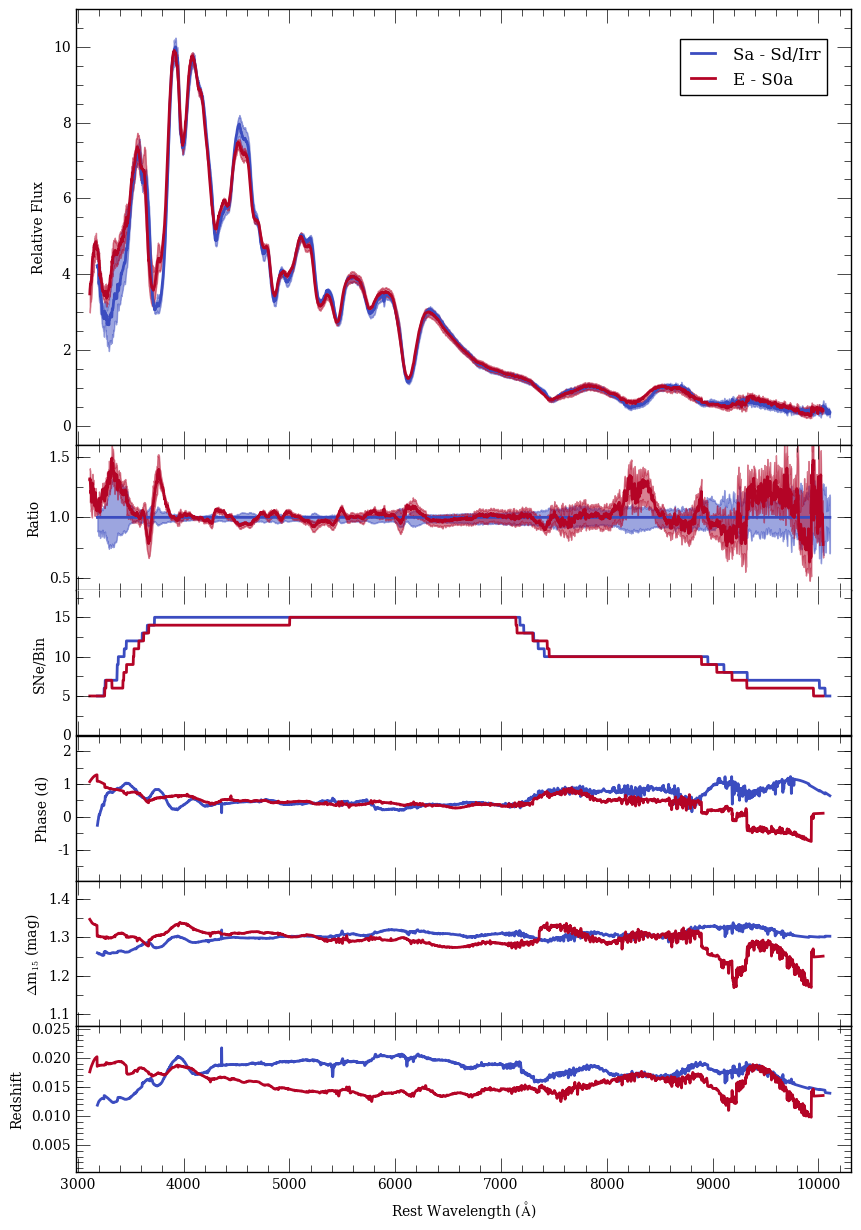

In [10]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_match_p0, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_max')
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_max_dm13')
query_db.comparison_plot(comps_host_match_p0, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [11]:
# diff_p0, err_p0, means_p0, varis_p0, EWs_p0 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=7600., w2=8200., w3=9000.)

In [3]:
# diff_p0_hk, err_p0_hk, means_p0_hk, varis_p0_hk, EWs_p0_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=3400., w2=3700., w3=4000.)

In [4]:
# query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp' and Supernovae.SN != '2008hv' and Supernovae.SN != '2002dj' and Supernovae.SN != '1994d'"]
query_host_match_m3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))"]

In [5]:
comps_host_match_m3, sn_arrays_match_m3, og_sn_arrays_match_m3, boot_sn_arrays_match_m3 = query_db.main(len(query_host_match_m3), query_host_match_m3, boot=True, medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
75 Total Spectra found
2 flagged spectra removed 73 spectra left
0 spectra of peculiar Ias removed 73 spectra left
59 spectra of SNe with host reddening corrections
Arrays cleaned
8 spectra may have telluric contamination


composite.py:1212: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1249: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


13 total SNe
removed spectra of SNe with A_V > 2

Using 45 spectra of 12 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)
gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 5 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))
51 Total Spectra found
3 flagged spectra removed 48 spectra left
0 spectra of peculiar Ias removed 48 spectra left
45 spectra of SNe with host reddening corrections
Arrays cleaned
5 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2

Using 45 spectra of 13 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  -2.26119091833
dm15:  1.27946829641
Redshift:  0.0162399554177
Morphology:  11.3584038563
Phase:  -2.44900543691
dm15:  1.2896409327
Redshift:  0.0121963439485
Morphology:  5.68347521036


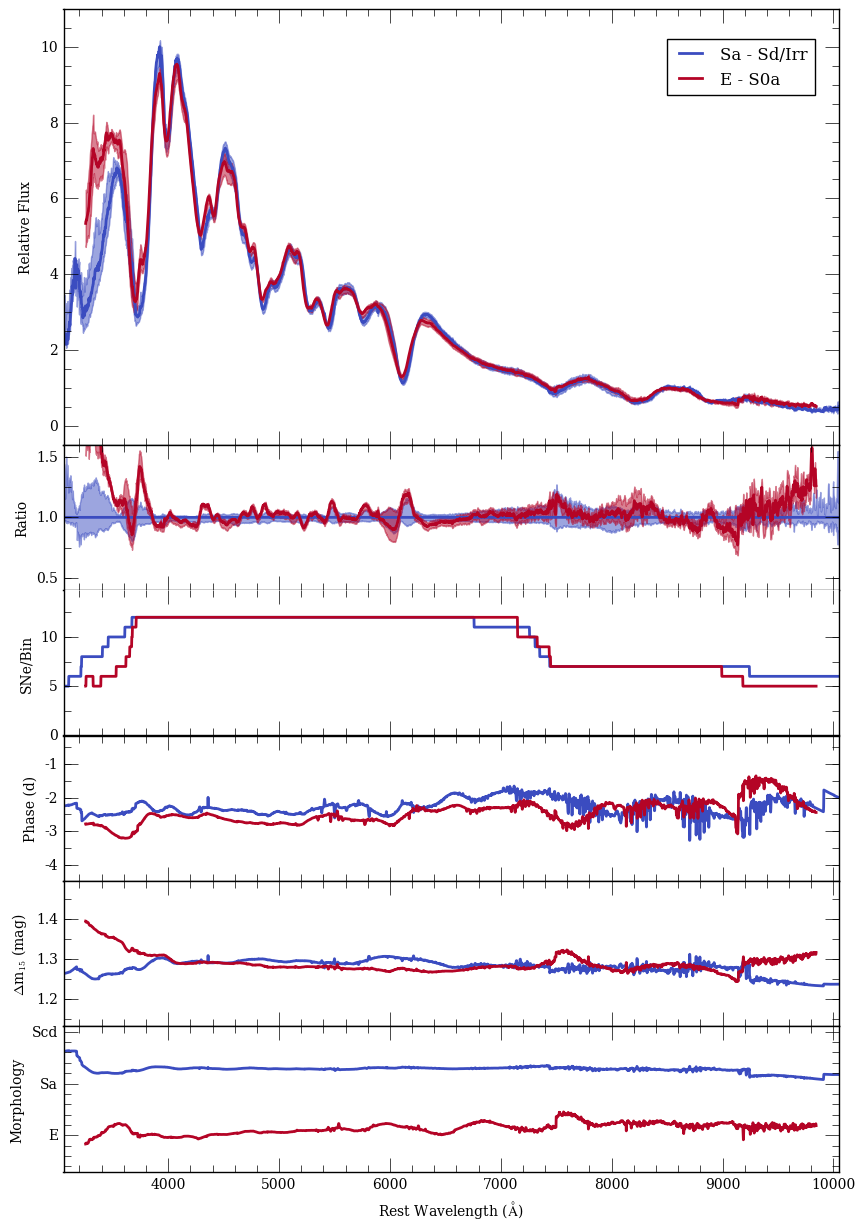

In [6]:
query_db.set_min_num_spec(comps_host_match_m3, 1)
# query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, morph=True, savename='host_composites_updated/host_m3_dm13')

In [7]:
# diff_m3, err_m3, means_m3, varis_m3, EWs_m3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=7600., w2=8200., w3=9000.)

In [8]:
# diff_m3_hk, err_m3_hk, means_m3_hk, varis_m3_hk, EWs_m3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=3400., w2=3700., w3=4000.)

In [9]:
# query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_match_p3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [10]:
comps_host_match_p3, sn_arrays_match_p3, og_sn_arrays_match_p3, boot_sn_arrays_match_p3 = query_db.main(len(query_match_p3), query_match_p3, boot=True, medmean=1, selection='max_coverage', verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
66 Total Spectra found
2 flagged spectra removed 64 spectra left
0 spectra of peculiar Ias removed 64 spectra left
55 spectra of SNe with host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2

Using 48 spectra of 14 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
81 Total Spectra found
5 flagged spectra removed 76 spectra left
0 spectra of pec

Phase:  2.83333750616
dm15:  1.29420971433
Redshift:  0.0152874738727
Morphology:  10.6714186542
Phase:  2.87385749267
dm15:  1.27155034623
Redshift:  0.014925601398
Morphology:  7.10920839092


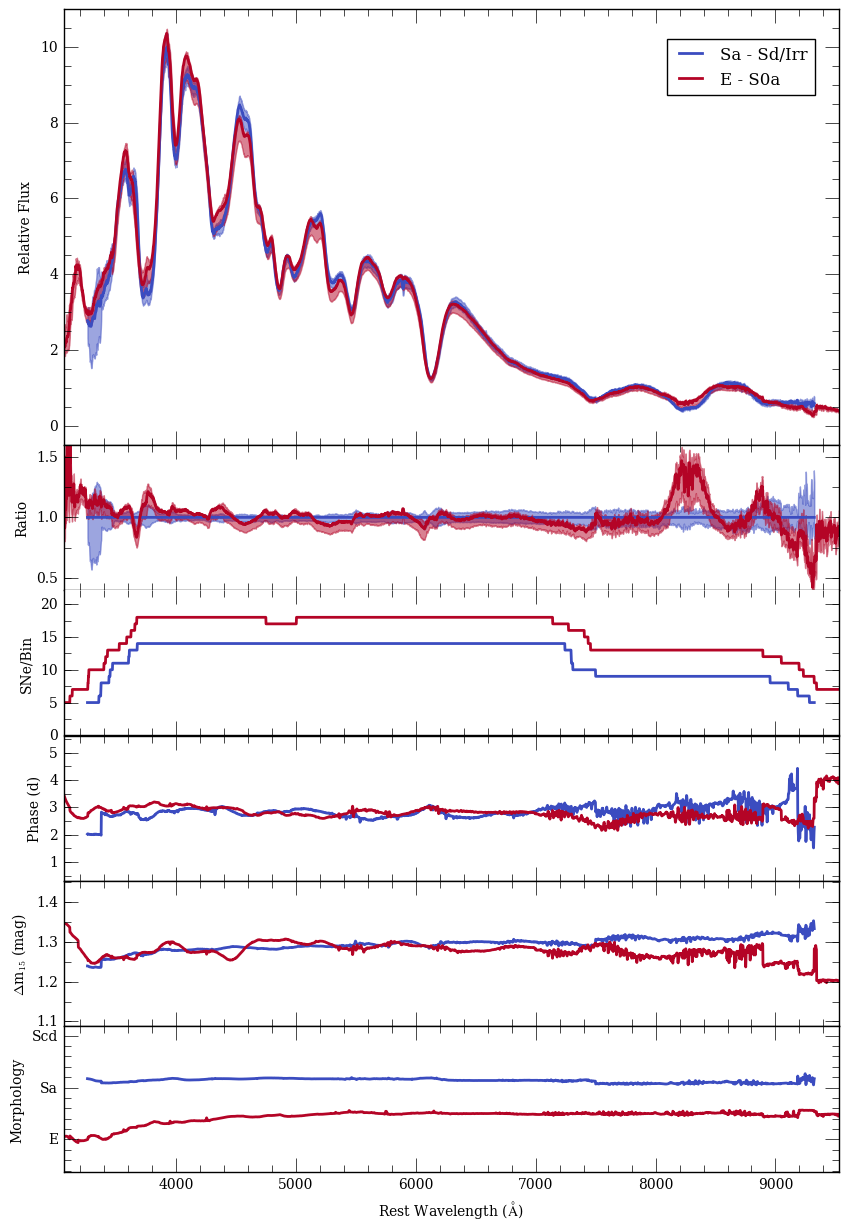

In [11]:
query_db.set_min_num_spec(comps_host_match_p3, 1)
# query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p3_dm13')

In [12]:
# diff_p3, err_p3, means_p3, varis_p3, EWs_p3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=7600., w2=8200., w3=9000.)

In [13]:
# diff_p3_hk, err_p3_hk, means_p3_hk, varis_p3_hk, EWs_p3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=3400., w2=3700., w3=4000.)

In [14]:
# query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
#                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))"]
query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 12 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 5 and phase <= 10 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.45) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.45))"]

In [15]:
comps_host_match_p8, sn_arrays_match_p8, og_sn_arrays_match_p8, boot_sn_arrays_match_p8 = query_db.main(len(query_host_match_p8), query_host_match_p8, boot=True, medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 12 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'
66 Total Spectra found
1 flagged spectra removed 65 spectra left
0 spectra of peculiar Ias removed 65 spectra left
60 spectra of SNe with host reddening corrections
Arrays cleaned
7 spectra may have telluric contamination
16 total SNe
removed spectra of SNe with A_V > 2

Using 38 spectra of 13 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 5 and phase <= 10 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.45) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.45))
49 Total Spectra found
7 flagged spectra removed 42 spectra left
0 spectra 

Phase:  7.50910166696
dm15:  1.2764840494
Redshift:  0.0131292075515
Morphology:  10.9857833573
Phase:  7.53999087824
dm15:  1.26346058364
Redshift:  0.0140092084041
Morphology:  7.13093491674


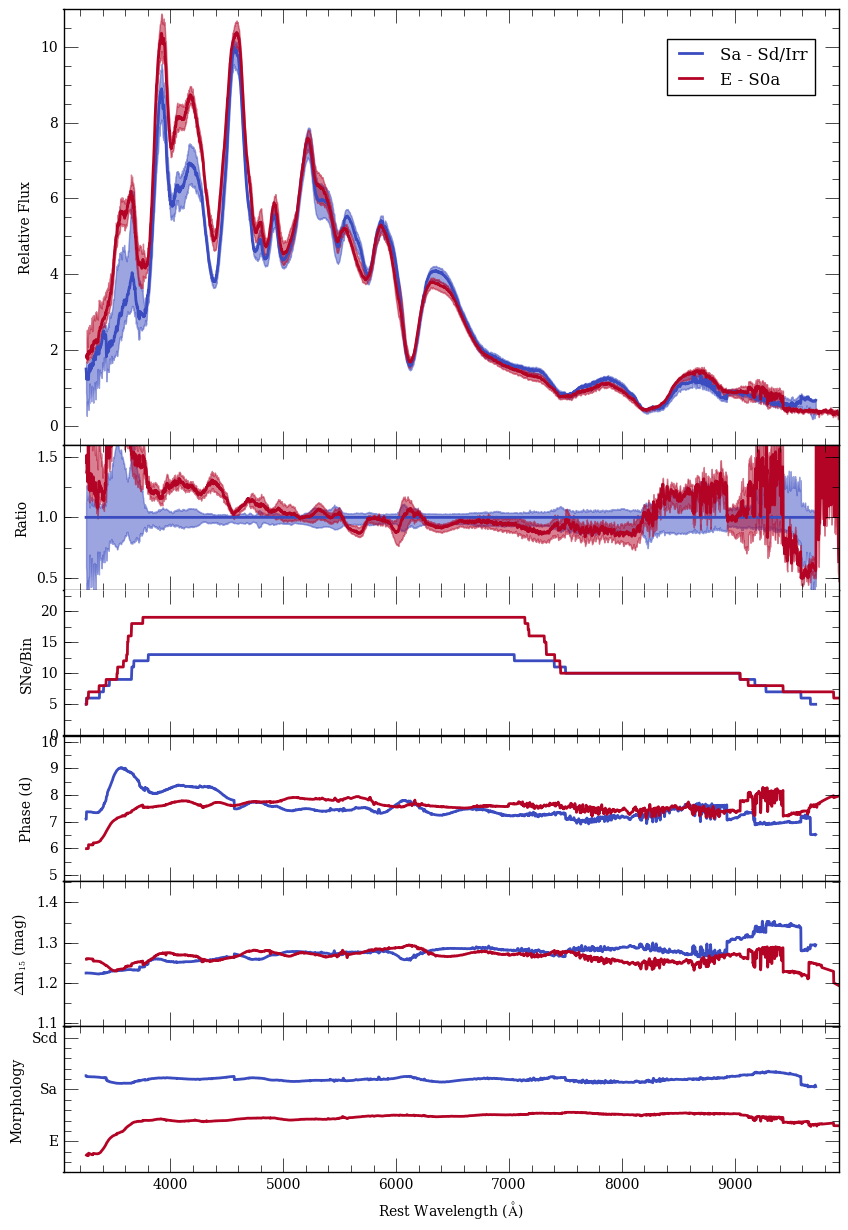

In [16]:
query_db.set_min_num_spec(comps_host_match_p8, 1)
# query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p9_dm13')

In [17]:
query_db.save_comps_to_files(comps_host_match_m3, 'siebert_host_morphology')
query_db.save_comps_to_files(comps_host_match_p3, 'siebert_host_morphology')
query_db.save_comps_to_files(comps_host_match_p8, 'siebert_host_morphology')

-2.26 1.28 0.016
../data/S19_Composite_Spectra/siebert_host_morphology_N=12_Nspec=45_phase=m2.26_dm15=1.28_z=0.016.txt
-2.45 1.29 0.012
../data/S19_Composite_Spectra/siebert_host_morphology_N=13_Nspec=45_phase=m2.45_dm15=1.29_z=0.012.txt
2.83 1.29 0.015
../data/S19_Composite_Spectra/siebert_host_morphology_N=14_Nspec=48_phase=p2.83_dm15=1.29_z=0.015.txt
2.87 1.27 0.015
../data/S19_Composite_Spectra/siebert_host_morphology_N=19_Nspec=76_phase=p2.87_dm15=1.27_z=0.015.txt
7.51 1.28 0.013
../data/S19_Composite_Spectra/siebert_host_morphology_N=13_Nspec=38_phase=p7.51_dm15=1.28_z=0.013.txt
7.54 1.26 0.014
../data/S19_Composite_Spectra/siebert_host_morphology_N=19_Nspec=42_phase=p7.54_dm15=1.26_z=0.014.txt


In [18]:
# diff_p8, err_p8, means_p8, varis_p8, EWs_p8 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=7600., w2=8200., w3=9000.)

In [19]:
# diff_p8_hk, err_p8_hk, means_p8_hk, varis_p8_hk, EWs_p8_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=3400., w2=3700., w3=4000.)

In [20]:
# plt.plot(boot_sn_arrays_match_p8[1][8].wavelength, boot_sn_arrays_match_p8[1][8].flux)
# plt.show()

In [21]:
# EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
# EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

# mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
# mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

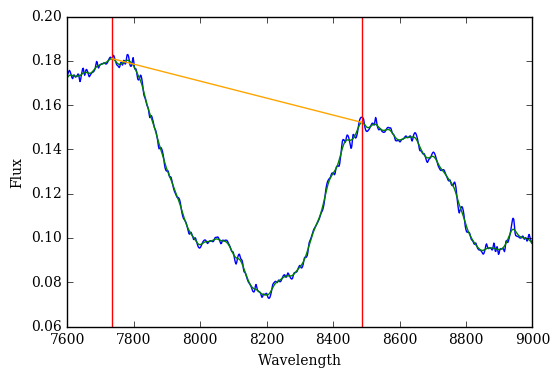

0 228.682378566 2.47998568428 0.777630666398 -3.94043779188


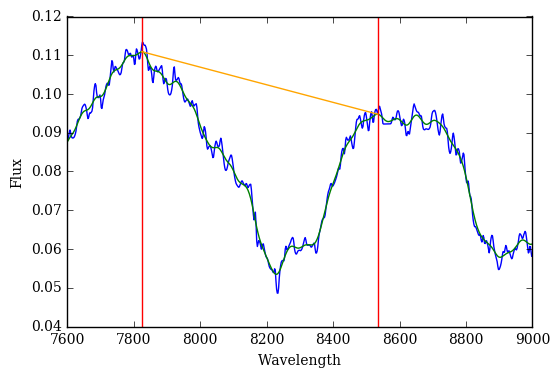

1 148.345369113 2.54535441181 1.03193126317 -0.0356138039118


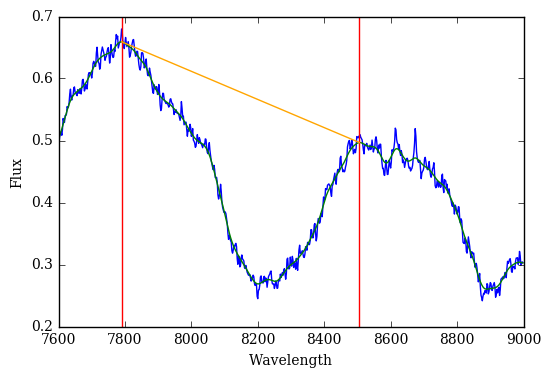

2 180.8280529 4.59499478754 1.25530038427 -4.60739951083


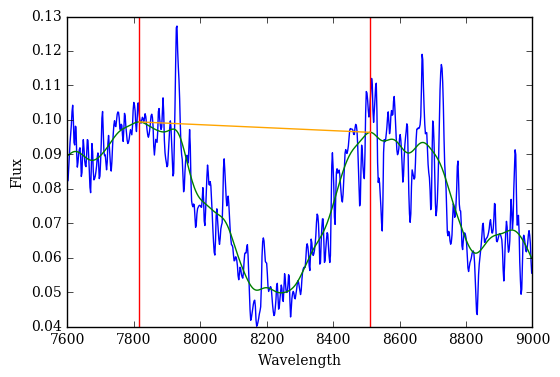

3 172.621012864 1.43252947027 2.25948678446 -0.969169427358


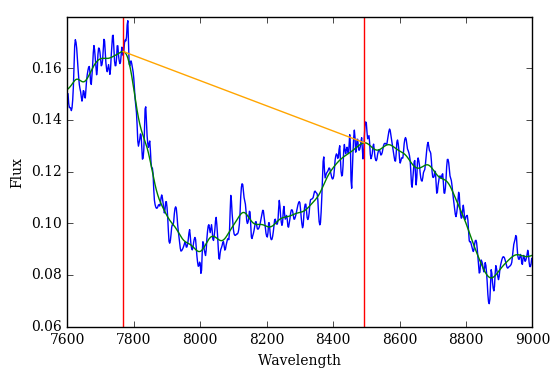

4 188.023055666 3.39571268197 3.05221339364 -4.68483572903


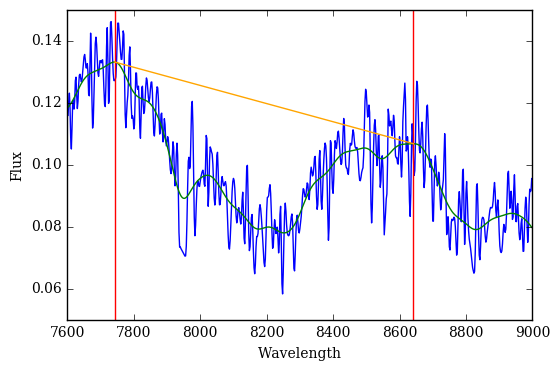

5 159.190018802 3.55908031009 5.5522162389 -4.96351761842


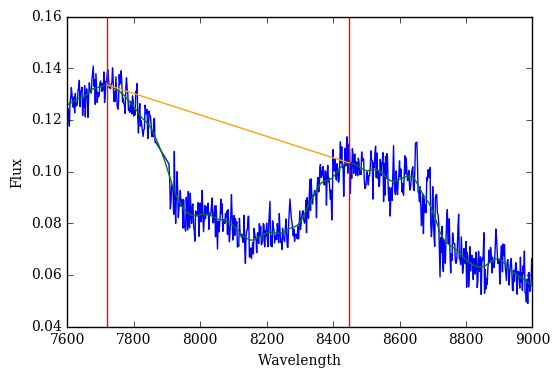

35 153.664091969 4.04764671656 1.71006995202 -5.86685998507


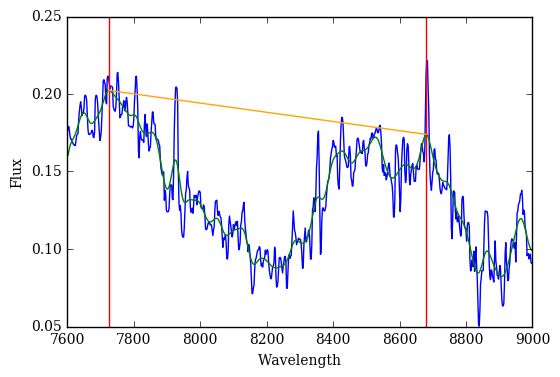

37 244.523598271 3.72154010171 6.53193494716 -4.93679511605


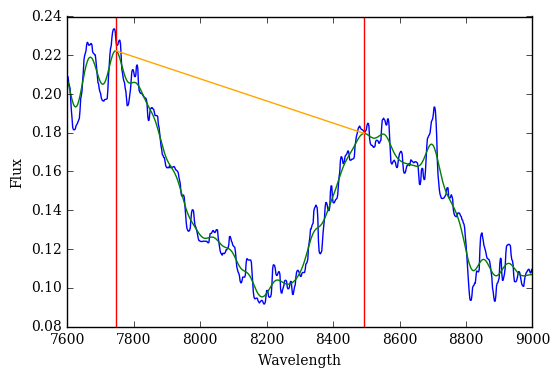

38 219.260974421 3.08762529959 1.37937837761 -4.11876775631


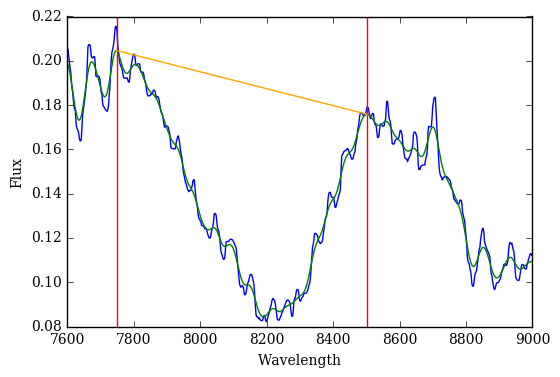

39 217.855065835 2.05661300201 0.642241361046 -3.30074039657


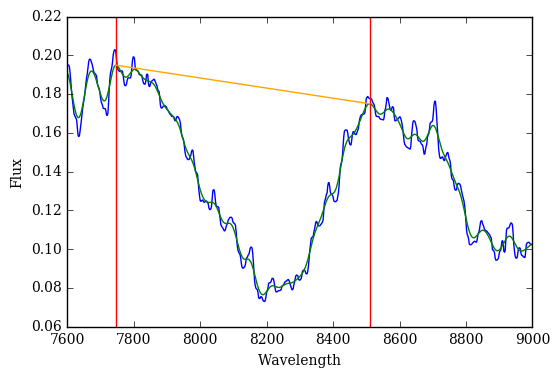

40 216.906009137 1.54958452288 0.621528029745 -2.48271303682


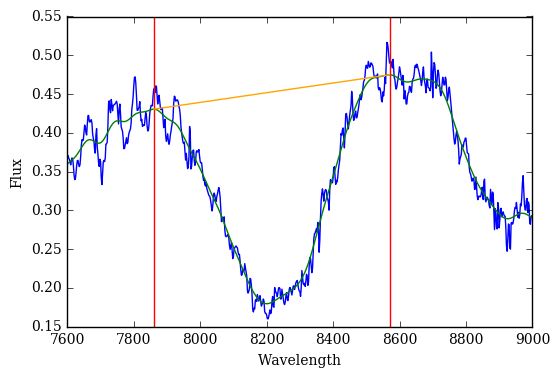

41 207.105256691 1.41801679409 0.998862869121 -0.846658317337


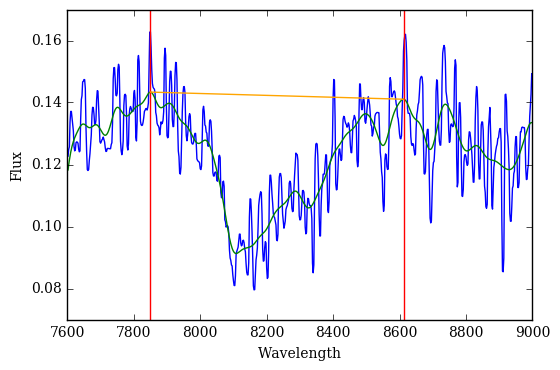

42 121.957968565 0.938301894666 1.95032664627 -0.0286309575939


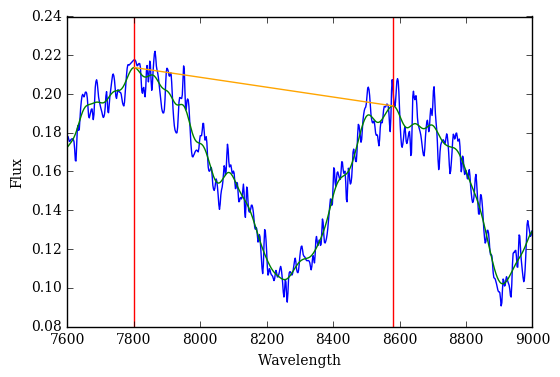

43 169.897183009 1.62996425368 1.69375504135 -2.3


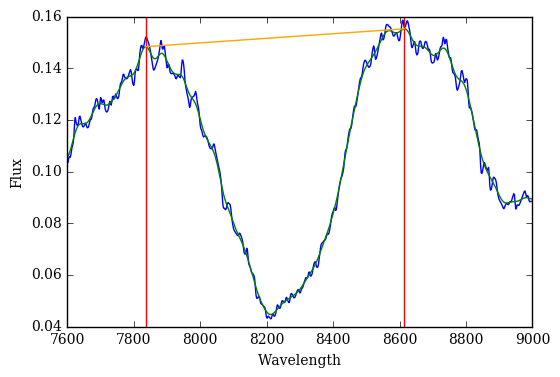

45 256.545292895 1.10919136746 0.594602145245 2.21072249175


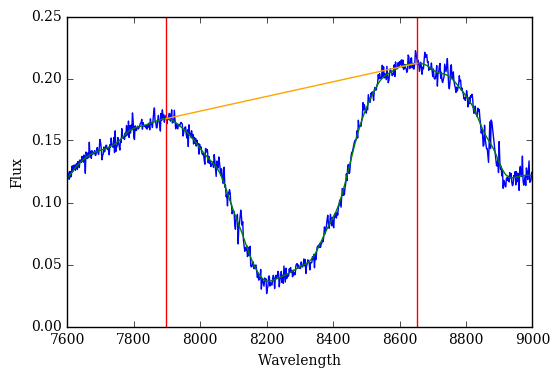

46 288.504122887 2.7202009519 0.762282807012 3.98580261012


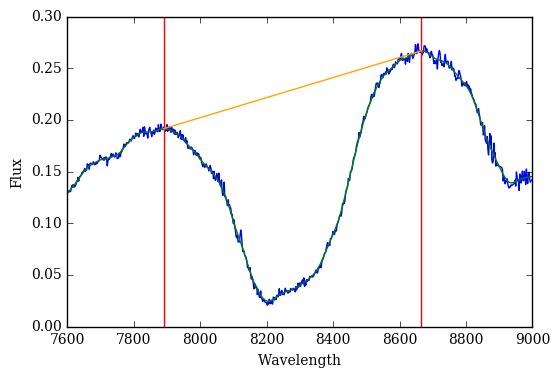

47 324.863641471 3.7647551658 0.597671953839 4.79694270084


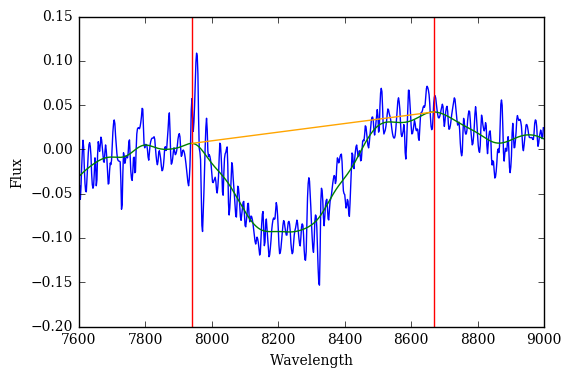

48 2008.80457042 112.584860344 2543.67860647 4.15787297081


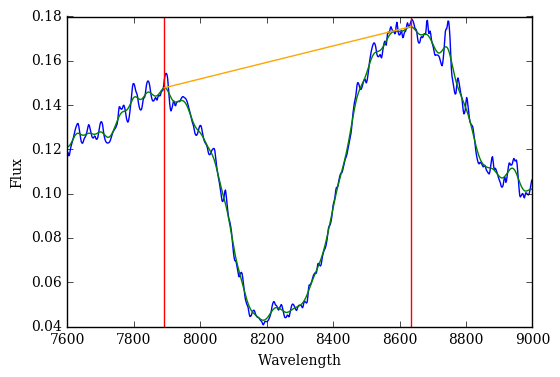

49 262.521017363 2.83934176395 1.05416542257 4.1776657262


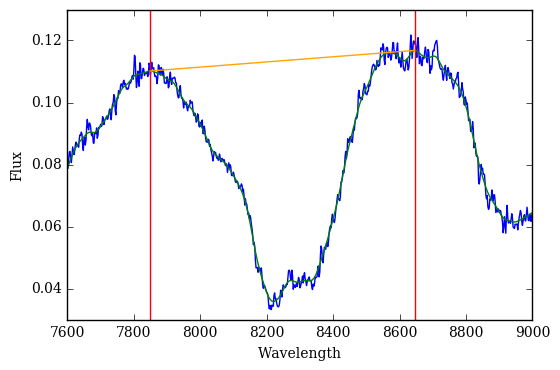

50 233.924486426 0.801926533917 1.12795540478 4.70749735325


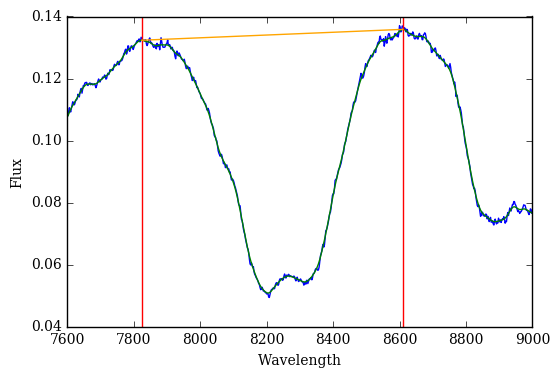

51 222.179002647 0.498920522831 0.359013308358 4.97680324346


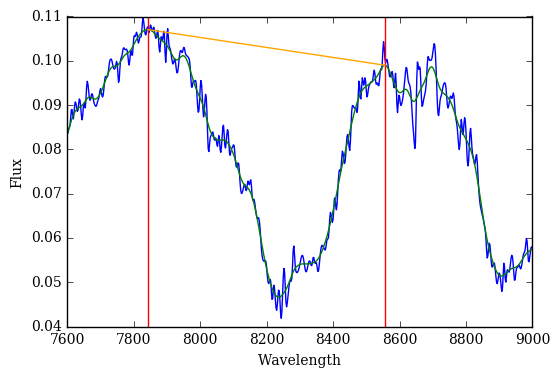

52 175.782245221 1.41147312141 1.08311506745 1.11438243384


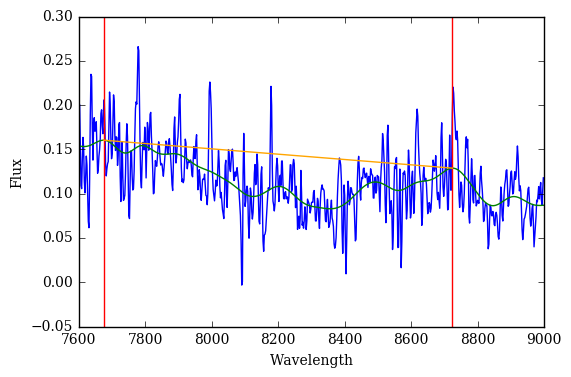

81 208.399515734 3.92790661272 13.1393787332 2.45862136157


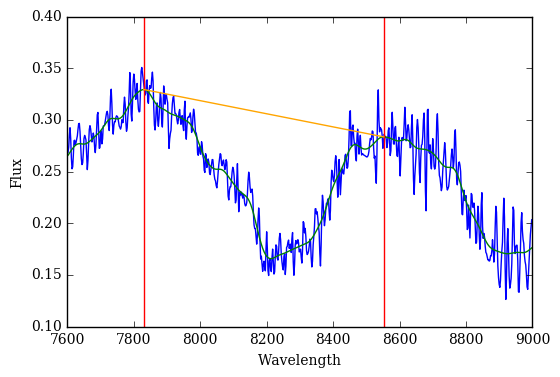

83 148.266892688 2.31836366123 2.47619136509 0.394351401025


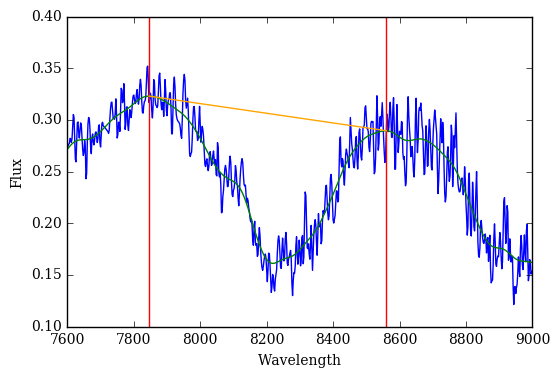

84 148.880815102 1.42444045352 2.59303589622 1.21052950583


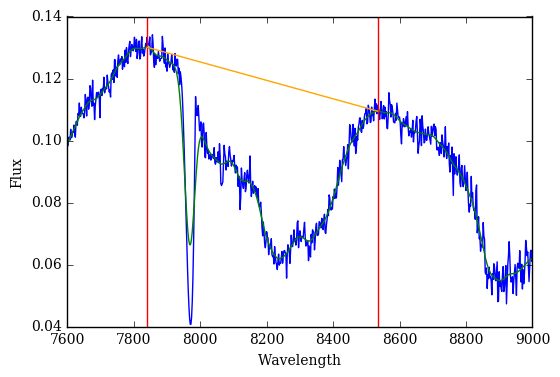

87 172.583663272 2.65432989324 366.274043653 0.160217261041


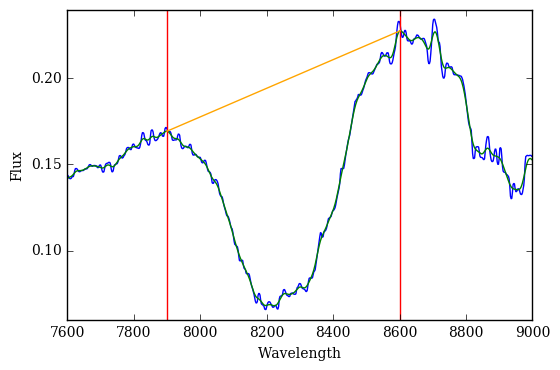

90 233.304192746 3.73956625138 0.304747750329 1.60742376189


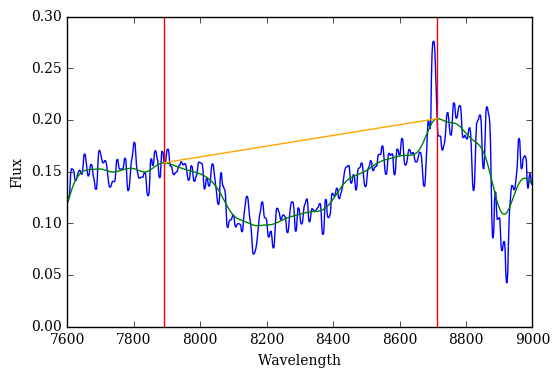

92 200.310114627 3.84186449817 1.57693064753 3.24347848138


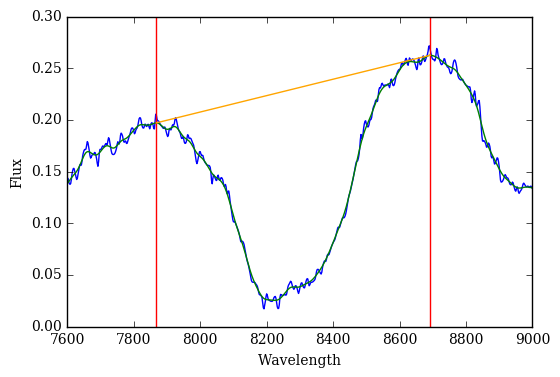

93 336.543352667 2.98577389052 1.28135497862 6.34444844505


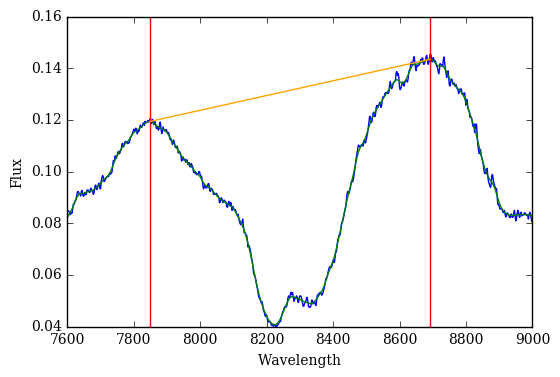

94 257.362703746 2.70505420916 0.572094209495 7.13571125623


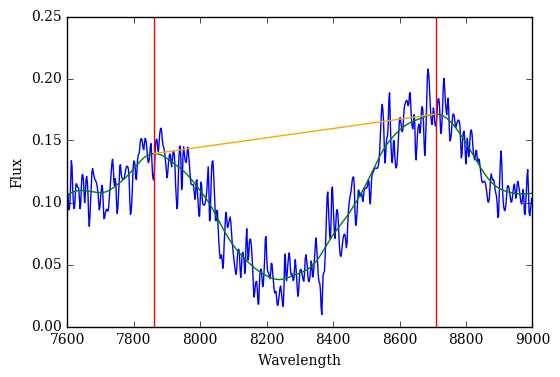

95 317.751305497 2.93288662408 2.75626361018 6.72512450084


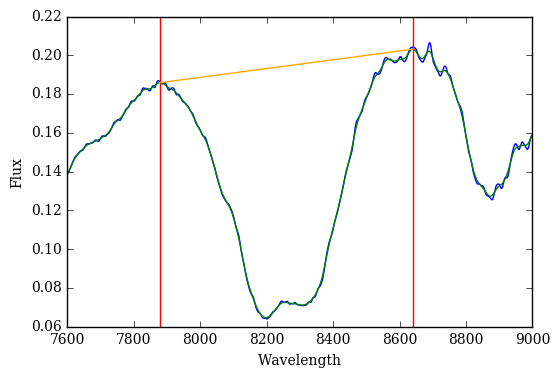

96 243.153589329 1.1271790551 0.199711821376 6.54640413505


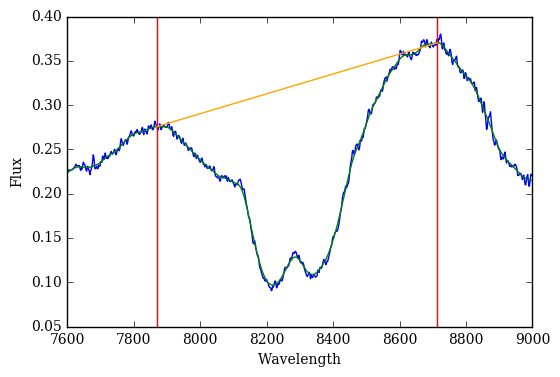

98 255.019709808 3.9132051007 0.804874750609 9.88674269185


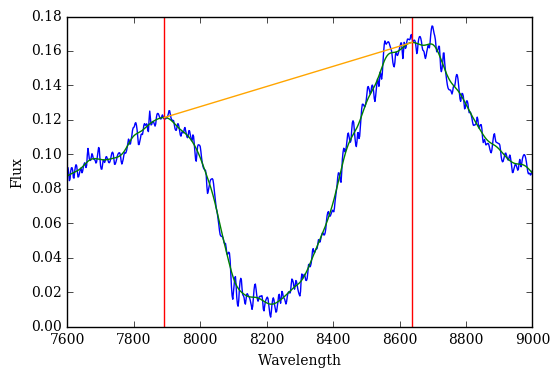

99 342.053647042 3.40091954321 1.57729901263 6.13029703391


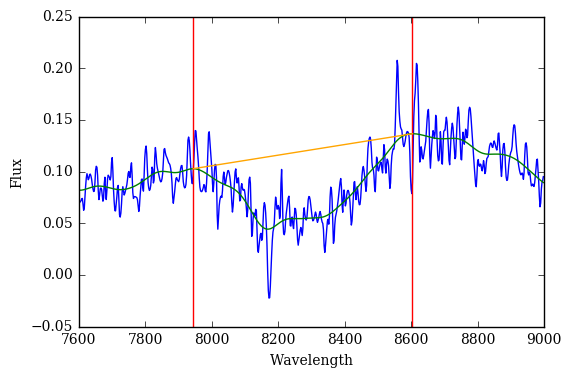

100 222.199881028 4.45020520165 6.40698361329 7.98817383746


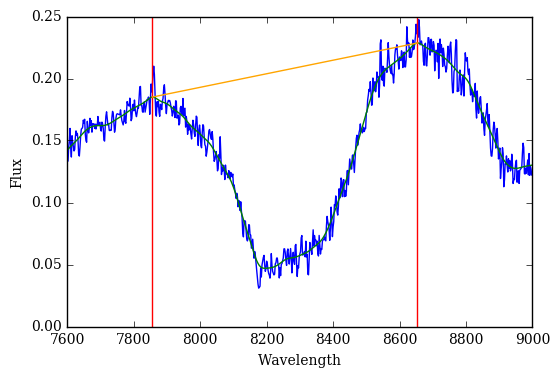

105 301.107355096 2.7549007624 1.83098574027 6.24203997669


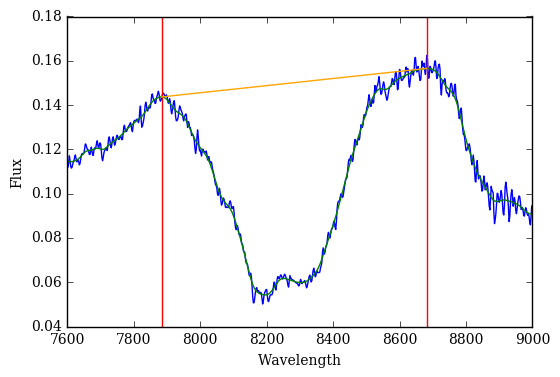

121 238.824984425 1.12264197289 0.863546947357 8.07188298168


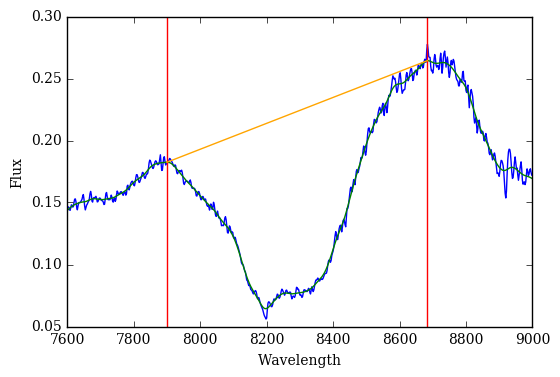

122 272.267426075 4.45106960588 1.4762433757 11.3156703528


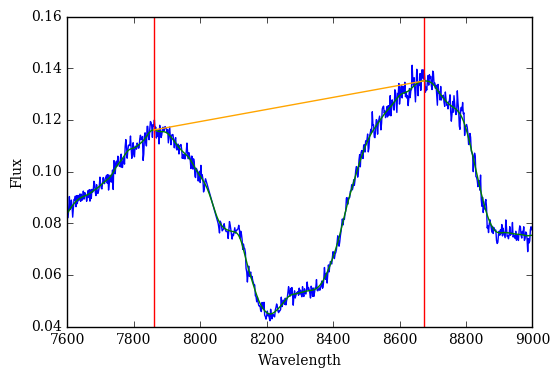

124 246.11542319 2.01790919465 0.864555018711 6.80457986352


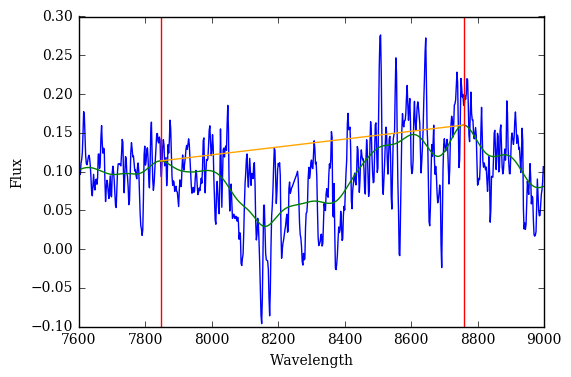

126 293.132024448 7.27499563987 33.3901753483 11.056618645


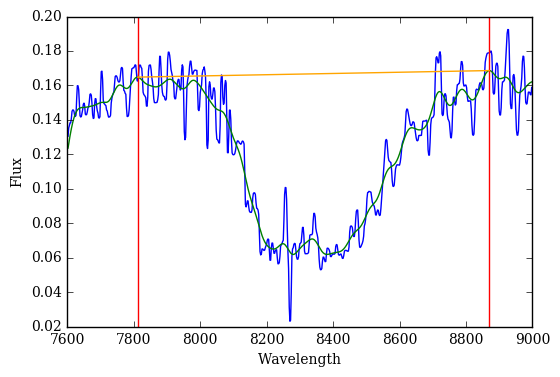

127 308.005822462 1.18594955306 2.31921945754 8.15164263984


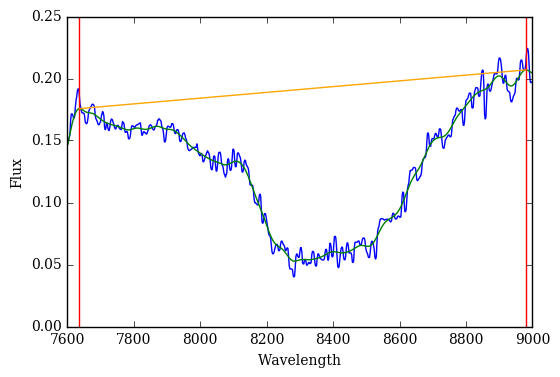

129 440.964241366 2.23684433081 1.64379286331 11.4237520788


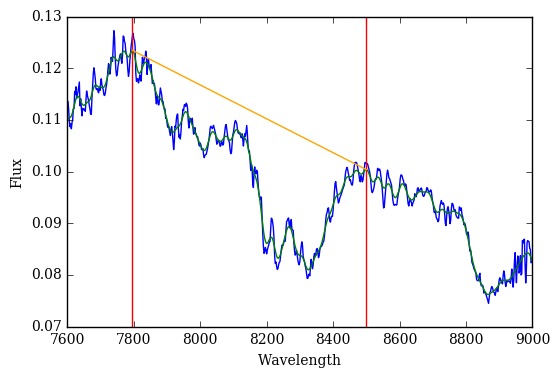

2 72.3123319332 3.08470567562 1.5890034018 -3.31509908347


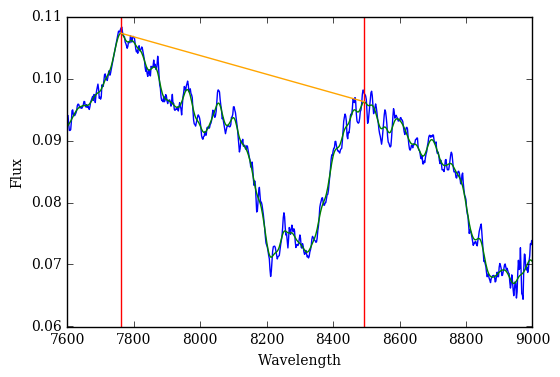

3 90.3147754266 1.61388929561 0.866156486684 -2.88052951619


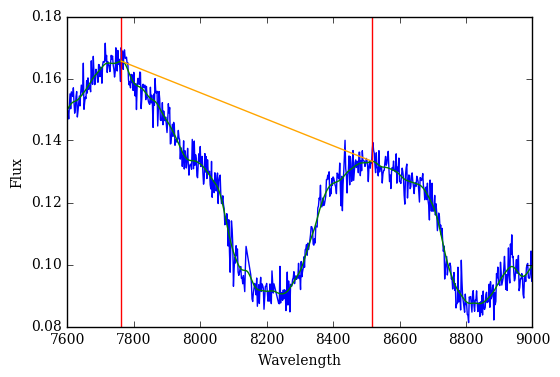

4 134.303805282 3.54826051549 1.63199792097 -5.15275433902


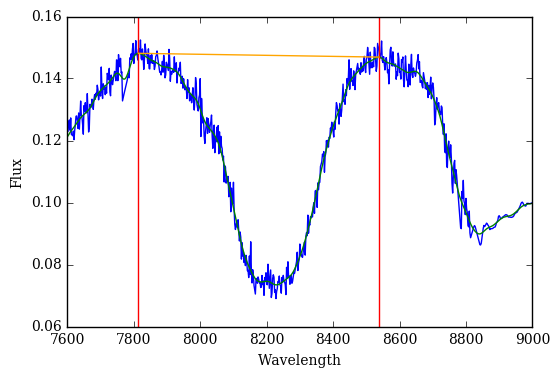

5 158.725951174 0.368415397013 0.685851266916 -1.05689134879


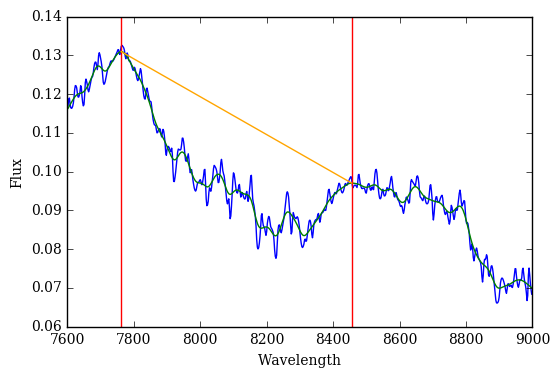

6 94.8163706839 5.28650296686 1.55195526965 -3.73265884251


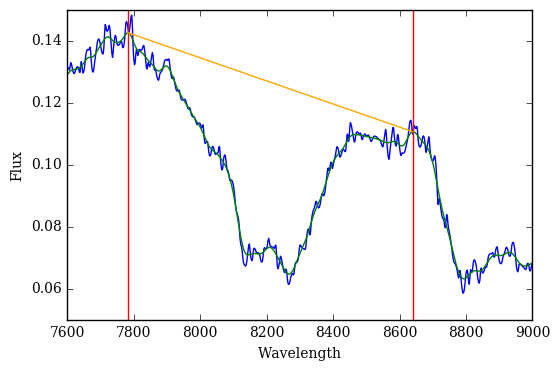

7 170.367239241 4.39634732362 9.77831031165 -0.139684313449


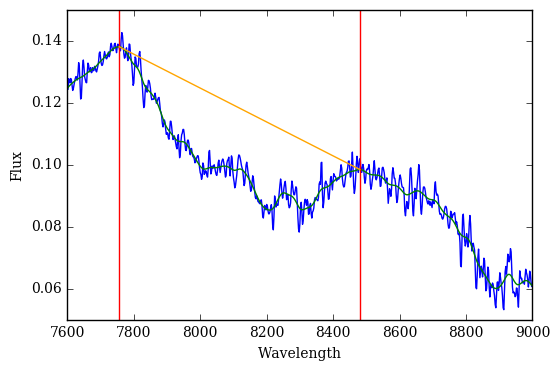

31 101.639799433 5.42101274628 2.08875090327 -3.87663165796


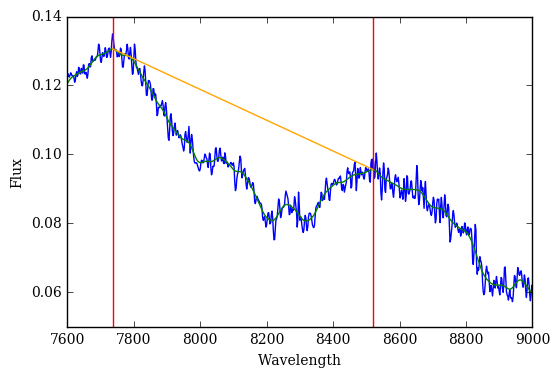

32 101.453234099 4.90432619637 1.7035525075 -3.04224375101


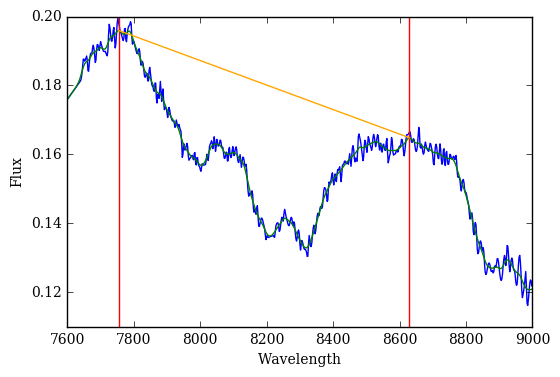

34 102.350449939 2.83121457834 0.759131349176 -4.48707135456


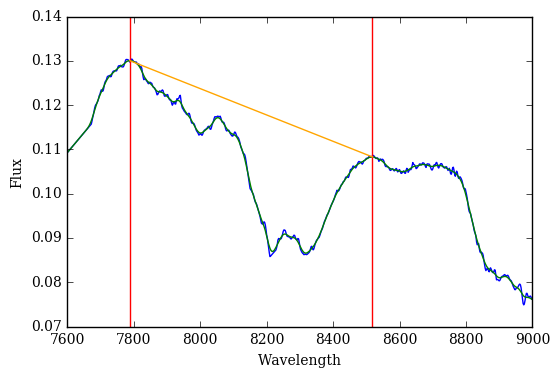

35 75.9805624803 2.70492724943 0.246742045419 -3.68380043538


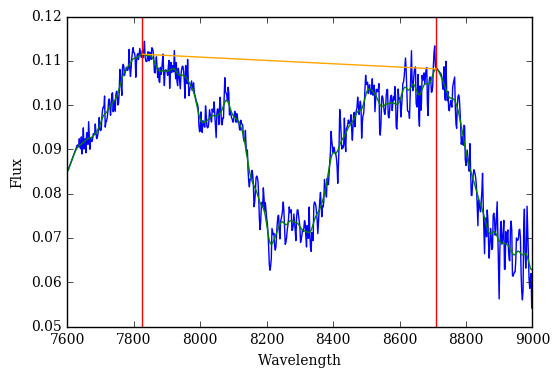

36 127.877636664 0.953361104424 1.46026448026 -2.07725859701


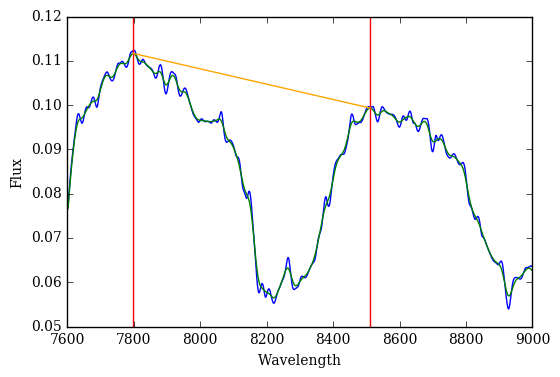

38 132.34124506 1.86303784246 0.520056132463 -1.55916014767


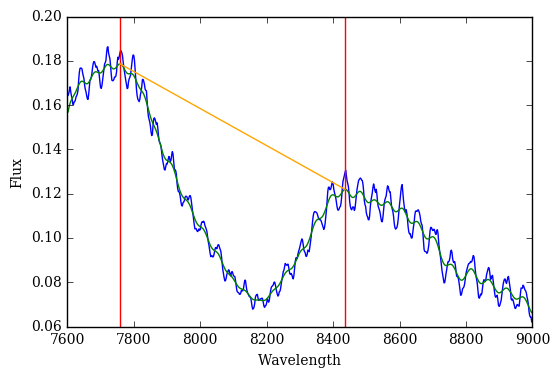

41 183.82768585 6.08900335597 2.99905908115 -4.47379163043


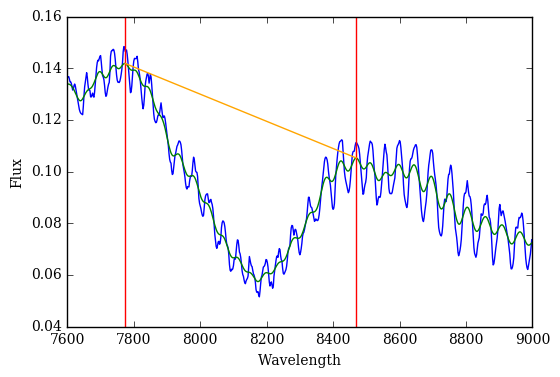

42 184.935132391 5.0391867201 2.16208541993 -3.65576427069


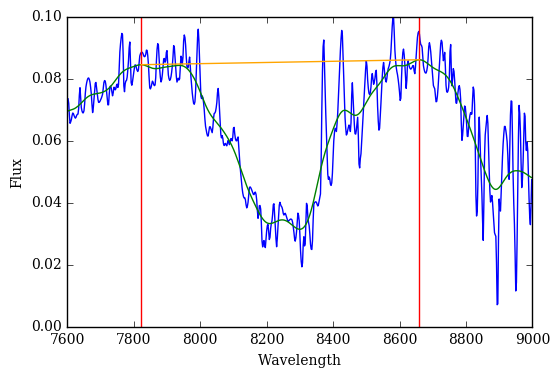

45 209.839289354 0.605610011312 2.70316573522 3.58025332076


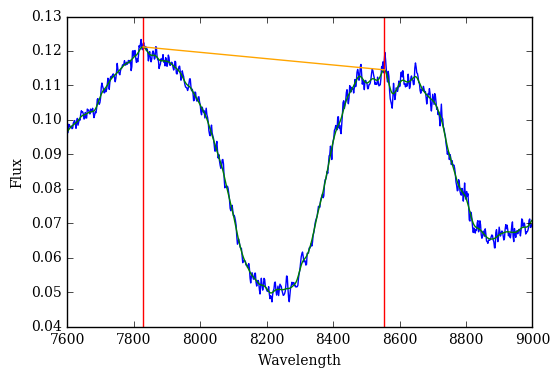

46 187.450350265 1.32963183947 0.7769199605 0.0482636142257


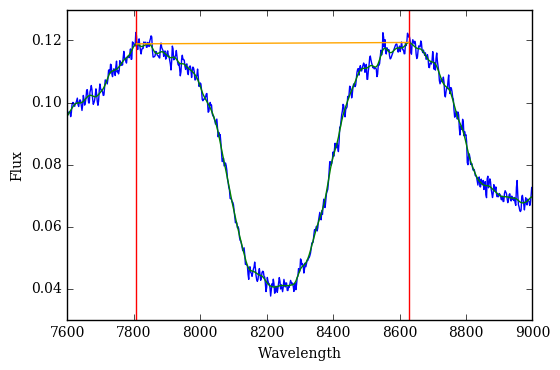

47 225.29167149 0.472088483832 0.950010505738 2.50234569345


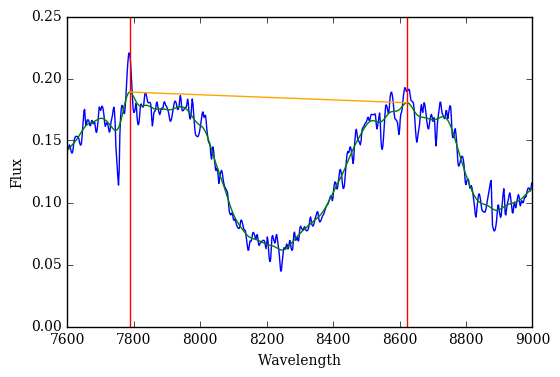

48 253.251893419 1.43737189289 2.05904546953 1.15147198481


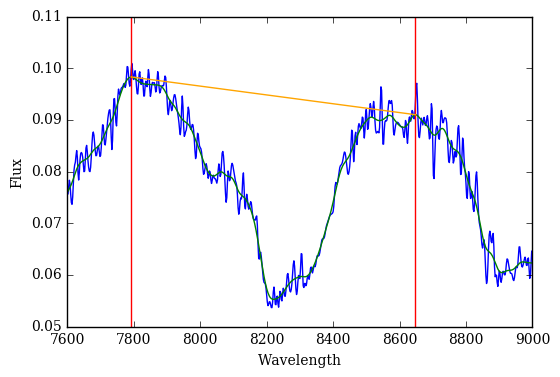

49 134.566062648 1.34249480894 2.24188688668 2.84264507511


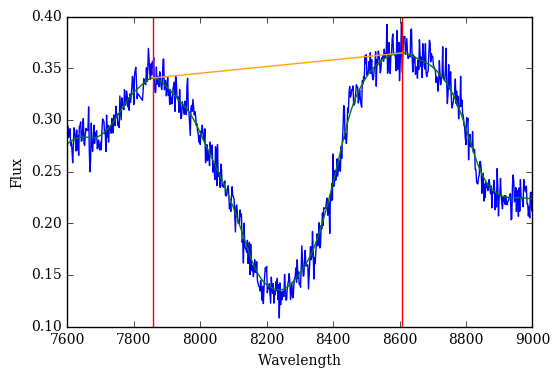

51 214.399512204 0.9981102689 15.5586038863 0.663105336289


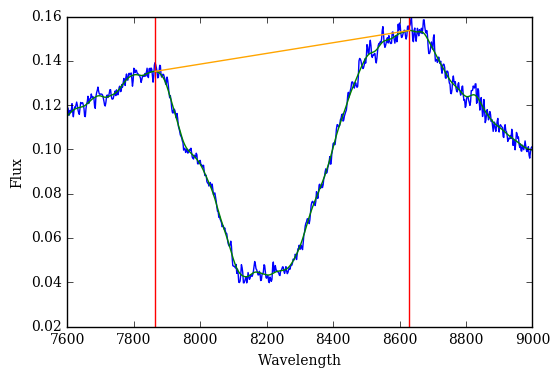

52 273.80461986 1.92862814953 0.95117906654 5.93382133097


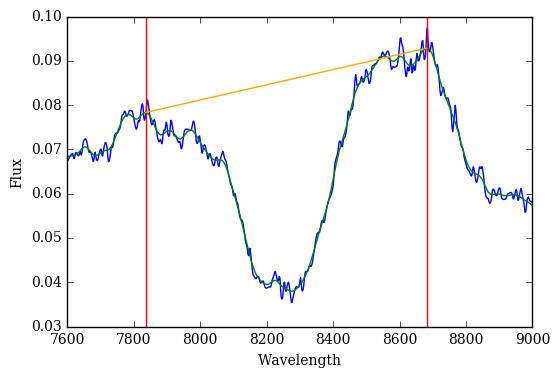

53 185.775747319 2.46953691451 1.20794735154 4.90461538461


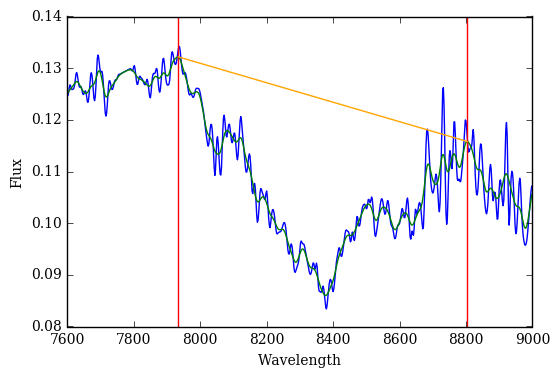

79 130.076463602 2.51289746461 1.30381849345 4.71385732675


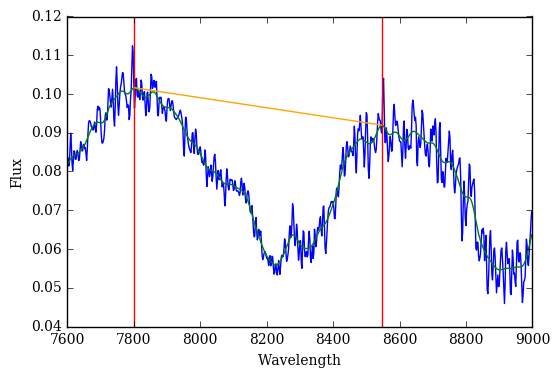

98 141.425460863 2.05823655139 2.66429705621 3.53469622136


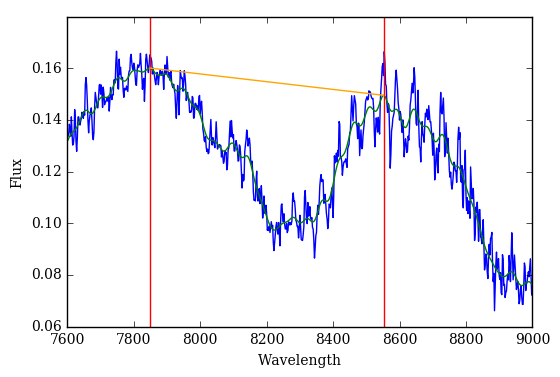

99 125.722817335 1.65677929167 1.87050911139 1.34972072102


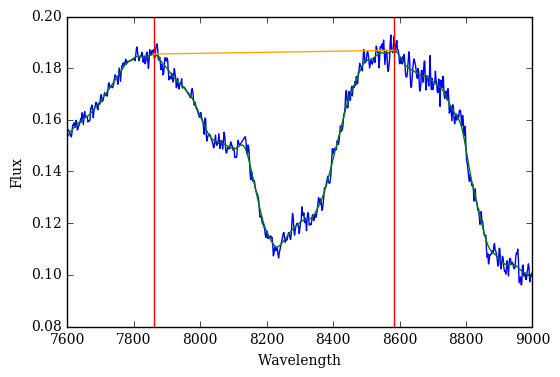

100 132.463563815 0.402024783071 0.58590221783 1.37396720087


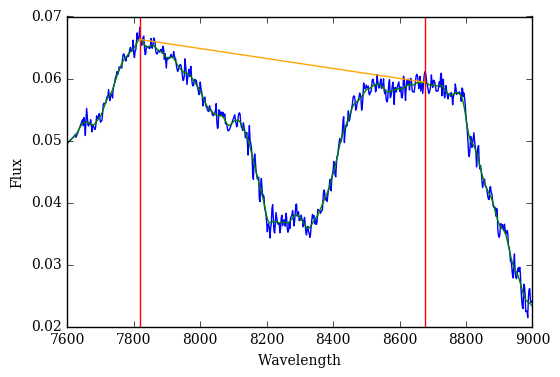

101 144.059341057 1.36946149041 0.895054768026 1.13582507972


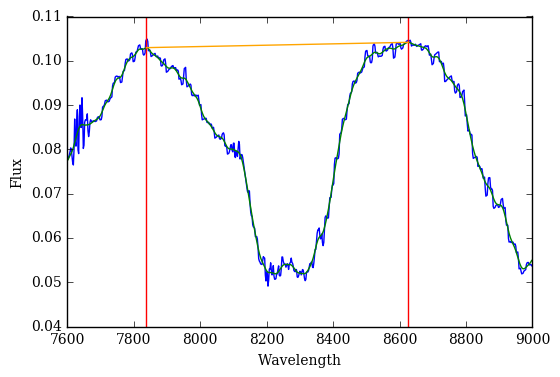

104 170.469139552 0.364507461326 0.502835639015 2.74236691809


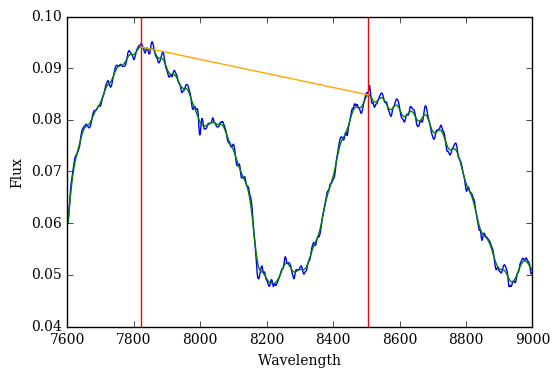

108 137.334329267 1.77469533878 0.573899476423 0.0768945718137


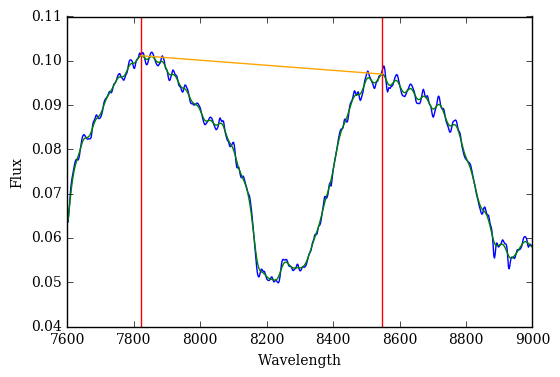

109 150.68827758 1.02846461127 0.491150323748 0.894921931557


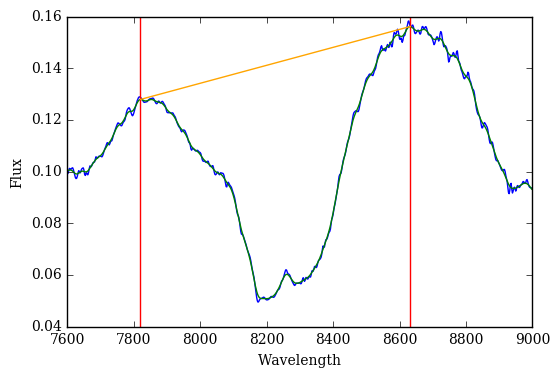

111 239.747784421 2.79024921026 0.903431363487 5.80308609002


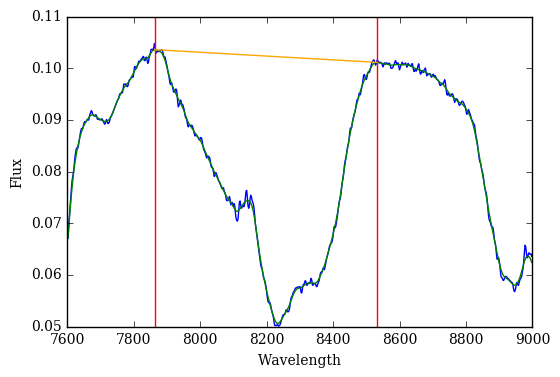

112 170.778999067 0.518114371687 0.256476136287 3.00379646498


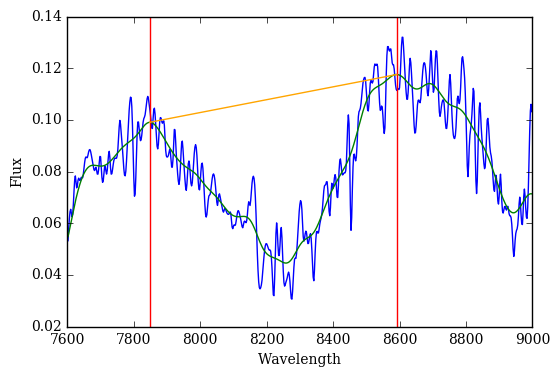

113 226.75558971 2.94523144183 3.080951649 3.00379646498


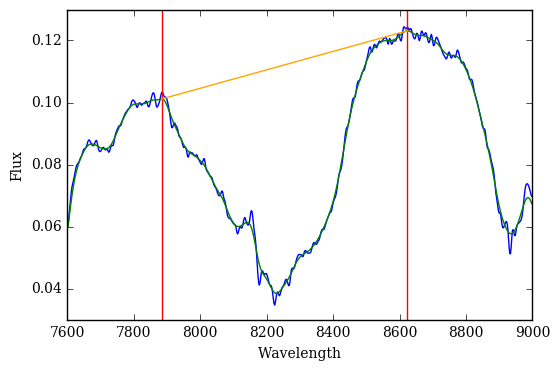

115 231.787104849 3.1365981569 0.481510982295 4.63985118446


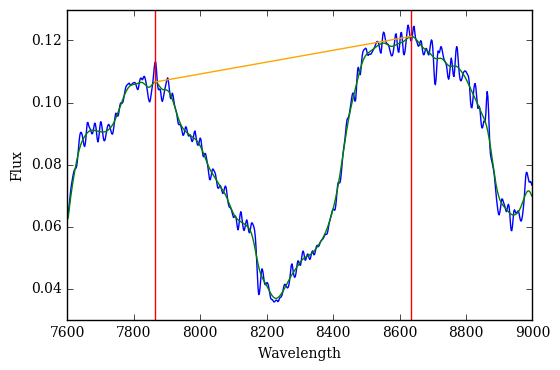

116 236.158777588 1.77791668164 1.49519858219 5.4578785442


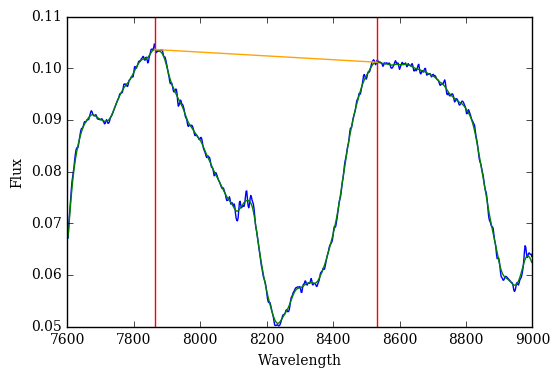

120 170.696784772 0.473354768968 0.307970217283 3.82182382472


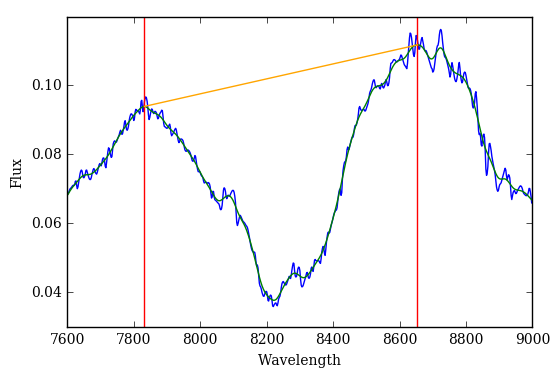

121 239.126889997 2.59081346451 0.780076387537 8.5508399914


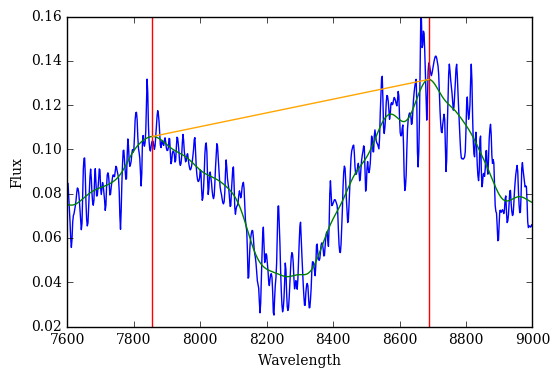

122 255.248469358 3.5389139384 3.38077129673 6.67856695827


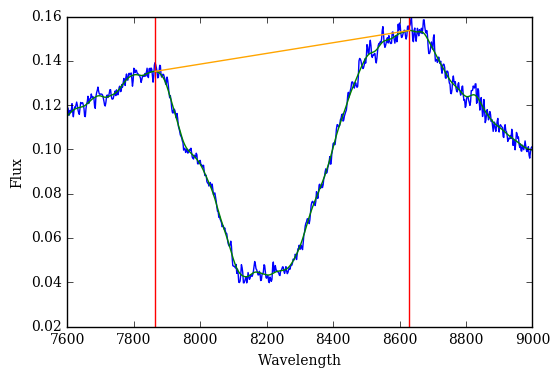

123 273.80461986 1.73332655989 0.802280146821 5.93382133097


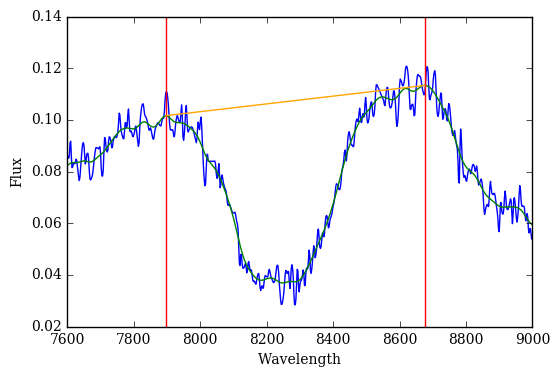

124 228.516945988 1.75471106506 1.47289345121 6.85857782641


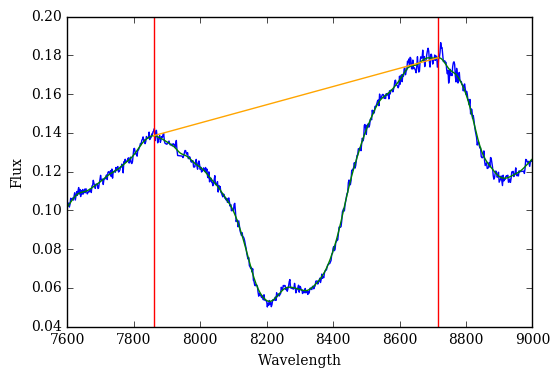

125 250.772737208 3.64455041568 0.59686479163 9.48420920886


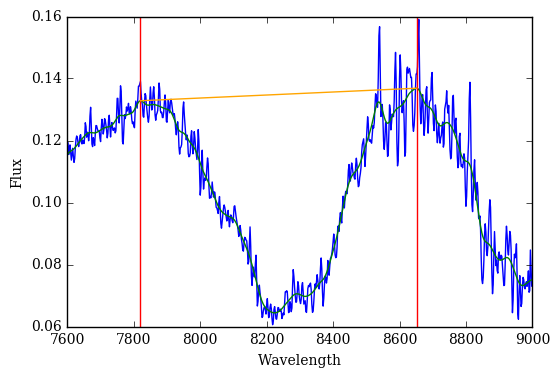

145 200.657211023 0.865940151811 1.56187099538 6.12627728454


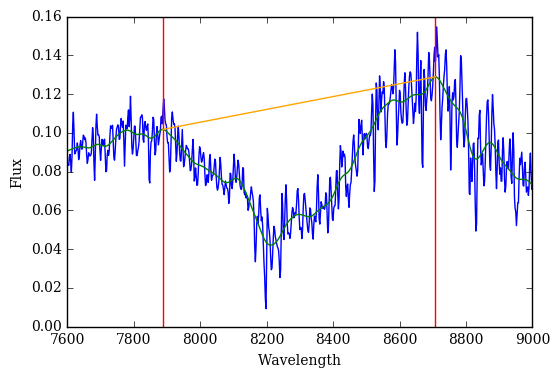

146 235.094826728 3.51110681803 7.1681414419 9.39146992652


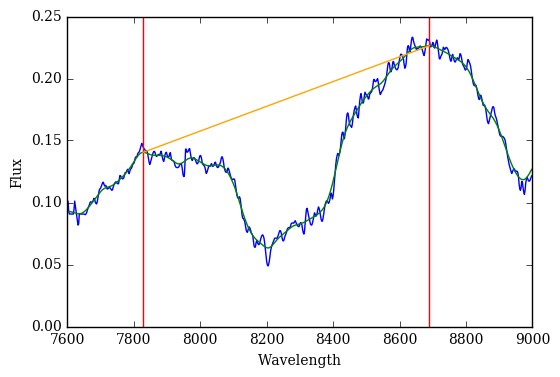

148 227.34617943 6.22892768971 1.94500187665 7.56199243319


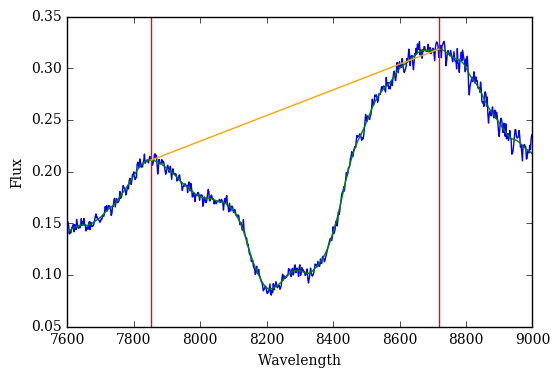

149 252.735168937 6.80223722357 1.52195566995 7.56199243319


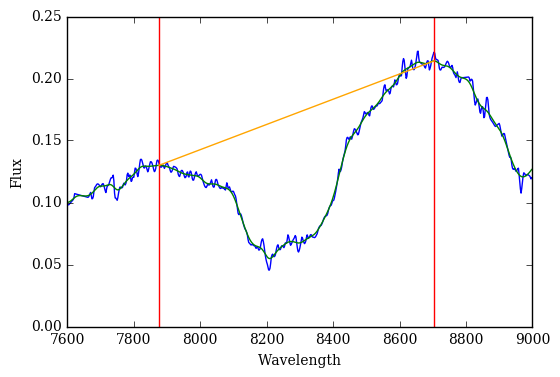

150 231.785153745 6.87445173973 2.23389610204 8.36526335237


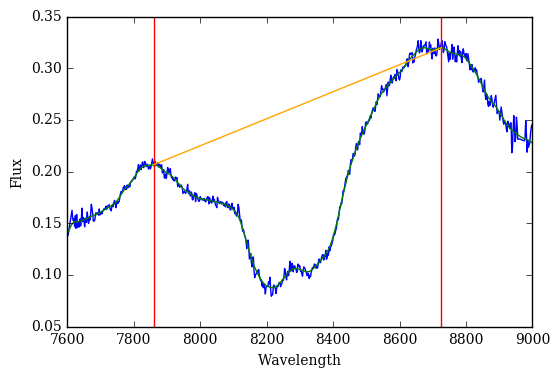

151 250.641799151 6.28636576912 3.07974292777 8.36526335237


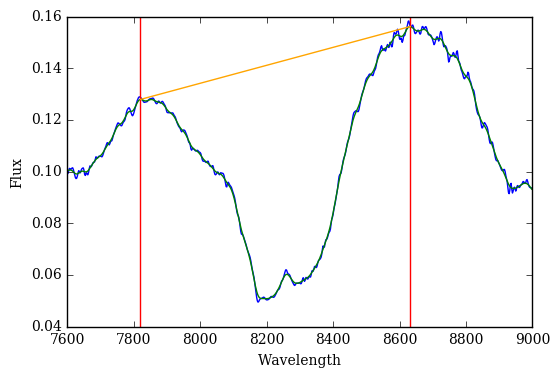

154 239.747784421 2.93393791741 0.912052108162 5.80308609002


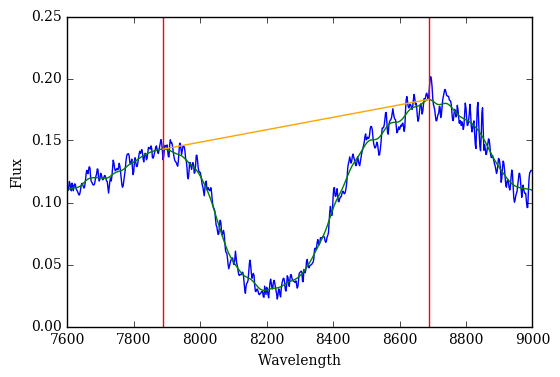

156 308.301420459 2.87270133547 1.52377599068 6.16056404623


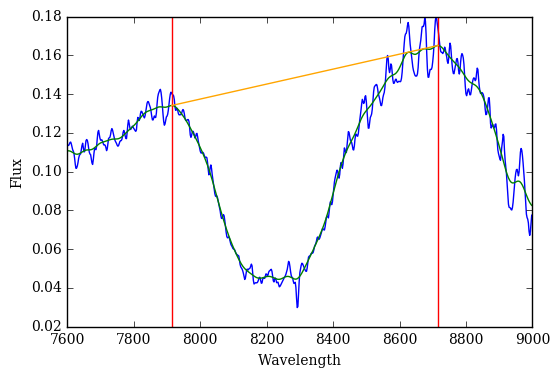

157 273.849272293 2.70284763104 1.32932130739 6.97859140597


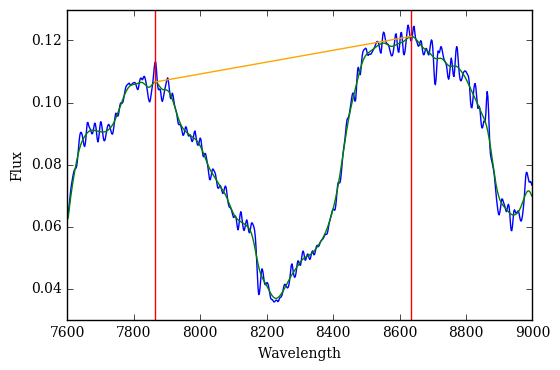

159 236.158777588 1.78567465903 1.34499677288 5.4578785442


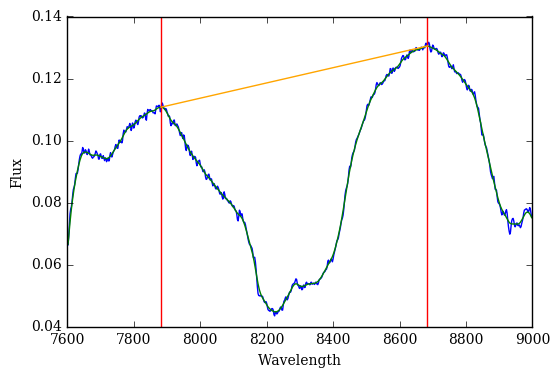

160 232.868750925 2.61050274769 0.43133290344 7.09393326369


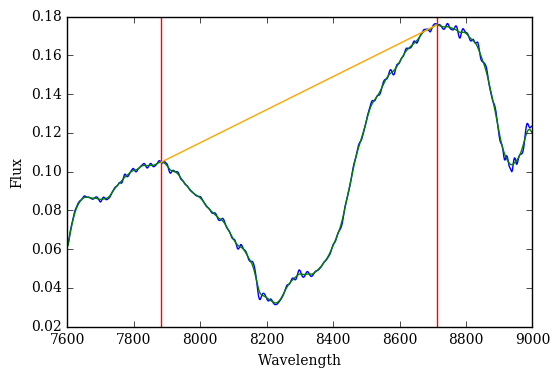

161 299.767519108 7.47249881912 0.742481561258 9.54801534292


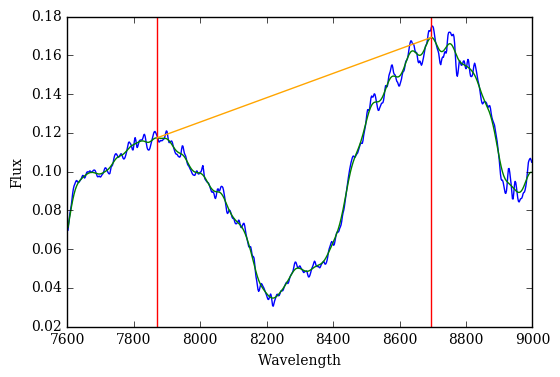

162 289.702603666 4.88901474282 1.11383321814 9.54801534292


In [25]:
EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late, SNs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early, SNs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

In [26]:
obj_list_late = []
for SN in SNs_late:
    obj_list_late.append(SN.name)
obj_set_late = set(obj_list_late)
print obj_set_late

obj_list_early = []
for SN in SNs_early:
    obj_list_early.append(SN.name)
obj_set_early = set(obj_list_early)
print obj_set_early

colors = ['turquoise', 'darkblue', 'green', 'limegreen']
color_dict_late = {}
for i, obj in enumerate(obj_set_late):
    color_dict_late[obj] = colors[i%4]
print color_dict_late

colors = ['darkred', 'pink', 'yellow', 'gold']
color_dict_early = {}
for i, obj in enumerate(obj_set_early):
    color_dict_early[obj] = colors[i%4]
print color_dict_early

set([u'2003cq', u'2007bc', u'2005kc', u'2002hw', u'2007bd', u'2005am', u'2006bh', u'2001ep', u'2015f', u'2005bo', u'2004ef', u'2002ha', u'2006ac', u'2002er'])
set([u'2007ap', u'2006bq', u'1994d', u'2002dj', u'2008hv', u'2004gs', u'2005w', u'2005cf', u'2006ej', u'1996x', u'1998dx', u'2005ki', u'2003ch', u'2006ef', u'2005el', u'2002he'])
{u'2003cq': 'turquoise', u'2005bo': 'darkblue', u'2001ep': 'limegreen', u'2002hw': 'limegreen', u'2007bd': 'turquoise', u'2005kc': 'green', u'2005am': 'darkblue', u'2007bc': 'darkblue', u'2015f': 'turquoise', u'2006bh': 'green', u'2004ef': 'green', u'2002ha': 'limegreen', u'2006ac': 'turquoise', u'2002er': 'darkblue'}
{u'2007ap': 'darkred', u'2006bq': 'pink', u'1994d': 'yellow', u'2002dj': 'gold', u'2008hv': 'darkred', u'2004gs': 'pink', u'2005w': 'yellow', u'2005cf': 'gold', u'2006ej': 'darkred', u'1996x': 'pink', u'1998dx': 'yellow', u'2005ki': 'gold', u'2003ch': 'darkred', u'2002he': 'gold', u'2005el': 'yellow', u'2006ef': 'pink'}


In [27]:
# ['E', 'E0', 'E1', 'E2', 'E23', 'E3', 'E6', 'S0', 'S0a', 'Sa', 'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'Sp']
E_E6 = 'darkred'
S0_Sab = '#F000C5'
Sb_Scd = '#1CB700'
irr = '#00AED6'
color_map = {1: 'darkred',   2: 'darkred',    3: 'darkred',    4: 'darkred',    5: 'darkred',     6: 'darkred',
             7:'darkred',    8:'red',    9:'red',    10:'limegreen',   11:'limegreen',    12:'seagreen',   13:'seagreen',    
             14:'darkblue',   15:'darkblue',    16:'black',   17:'black',    18:'black'}
m_colors_late = []
m_colors_early = []
for m in morphs_late:
    m_colors_late.append(color_map[int(m)])
for m in morphs_early:
    m_colors_early.append(color_map[int(m)])
print morphs_late
print m_colors_late
print morphs_early
print m_colors_early

[10.0, 11.0, 14.0, 13.0, 12.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 13.0, 12.0, 12.0, 12.0, 10.0, 11.0, 10.0, 10.0, 12.0, 11.0, 11.0, 10.0, 10.0, 12.0, 11.0, 12.0, 10.0, 11.0, 12.0, 10.0, 12.0, 10.0, 10.0, 12.0, 10.0, 10.0, 10.0]
['limegreen', 'limegreen', 'darkblue', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'seagreen', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen']
[8.0, 8.0, 1.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0, 4.0, 1.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 2.0, 2.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0, 

In [28]:
phases_tot = np.concatenate((phases_late, phases_early))
EWs_tot = np.concatenate((EWs_late, EWs_early))
errs_tot = np.concatenate((err_late, err_early))
SNs_tot = EW_spec_list_late + EW_spec_list_early

avg_phase_late = np.average(phases_late)
avg_EW_late = np.average(EWs_late)
avg_phase_early = np.average(phases_early)
avg_EW_early = np.average(EWs_early)
print avg_phase_late, avg_EW_late
print avg_phase_early, avg_EW_early

avg_phase = np.average(phases_tot)
avg_EW = np.average(EWs_tot)

phases_late_new = phases_late - avg_phase_late
phases_early_new = phases_early - avg_phase_early
EWs_late_new = EWs_late - avg_EW_late
EWs_early_new = EWs_early - avg_EW_early

phases_tot_new = phases_tot - avg_phase
EWs_tot_new = EWs_tot - avg_EW
print avg_phase, avg_EW
# phases_late = phases_late + avg_phase
# phases_early = phases_early + avg_phase
# EWs_late = EWs_late + avg_EW
# EWs_early = EWs_early + avg_EW

2.64062925157 235.171071045
2.87988931723 191.665109807
2.77807652333 210.178284802


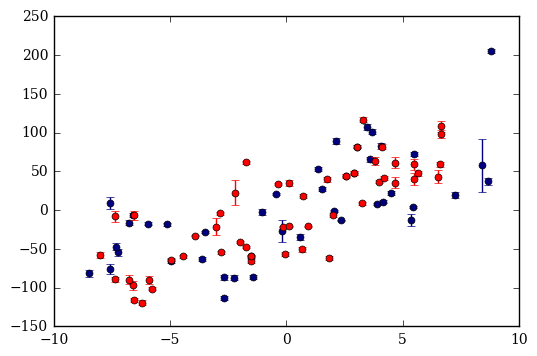

In [29]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

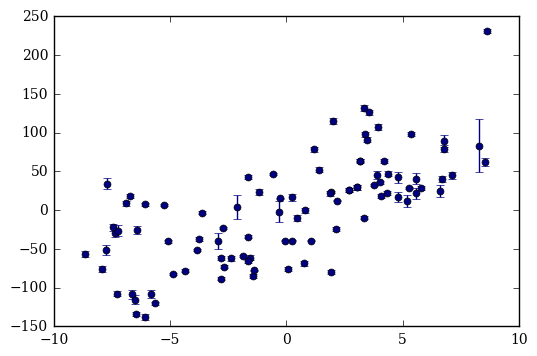

In [30]:
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.show()

In [31]:
from scipy.optimize import curve_fit
from scipy.special import erf

In [32]:
def lin(x, A, B):
    return A + B*x

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [33]:
x = np.linspace(-10,14,1000)

In [34]:
popt2_late, pcov2_late = curve_fit(lin, phases_late, EWs_late, p0=None, sigma=err_late, absolute_sigma=True)
popt2_early, pcov2_early = curve_fit(lin, phases_early, EWs_early, p0=None, sigma=err_early, absolute_sigma=True)

popt2_tot, pcov2_tot = curve_fit(lin, phases_tot_new, EWs_tot_new, p0=None, sigma=errs_tot, absolute_sigma=True)

In [35]:
y_late = popt2_late[0] + popt2_late[1]*x
y_early = popt2_early[0] + popt2_early[1]*x
y_tot = popt2_tot[0] + popt2_tot[1]*x

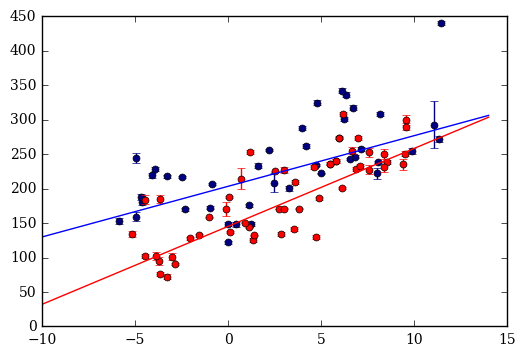

In [36]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(x,y,'g')
plt.plot(x,y_late,'b')
plt.plot(x,y_early,'r')
# plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

-19.7099336274 10.707411663


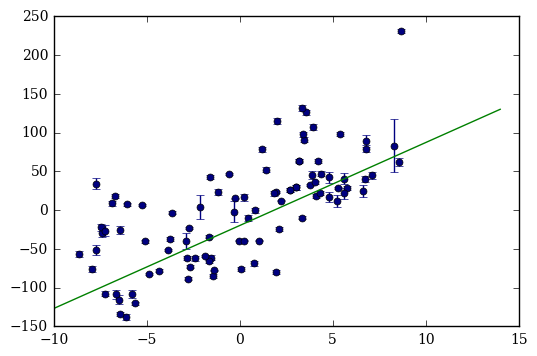

In [37]:
print popt2_tot[0], popt2_tot[1]
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [38]:
ints_tot = []
slopes_tot = []
for i in range(1000):
    strap_list = np.random.random_sample(len(EWs_tot_new))
    strap_list *= len(EWs_tot_new)
    strap_list = strap_list.astype(int)
    new_phases_tot = []
    new_EWs_tot = []
    new_errs_tot = []
    for i in strap_list:
        new_phases_tot.append(phases_tot_new[i])
        new_EWs_tot.append(EWs_tot_new[i])
        new_errs_tot.append(errs_tot[i])
    
    popt2_tot, pcov2_tot = curve_fit(lin, new_phases_tot, new_EWs_tot, p0=None, sigma=new_errs_tot, absolute_sigma=True)
    ints_tot.append(popt2_tot[0])
    slopes_tot.append(popt2_tot[1])
    
#     plt.errorbar(new_phases_tot, new_EWs_tot, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
#     plt.plot(x,y_tot,'g')

In [39]:
res_arrs = []
for i in range(len(slopes_tot)):
    ew = ints_tot[i] + slopes_tot[i]*x
    res_arr = np.absolute(ew - y_tot)
    res_arrs.append(res_arr)
res_arrs_t = np.transpose(res_arrs)

In [40]:
sigs = []
for ps in res_arrs_t:
    sig = np.average(np.percentile(ps, [32, 68]))
    sigs.append(sig)

4.40717093508
4.9492080457


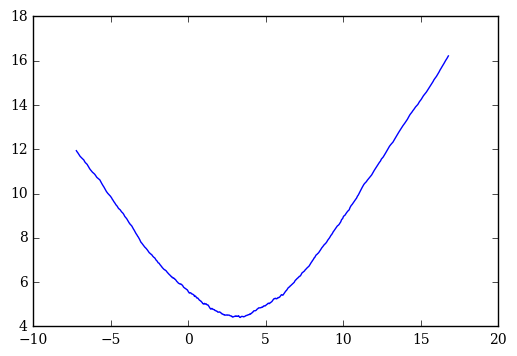

In [41]:
from scipy.interpolate import interp1d
interp_sig = interp1d(x+avg_phase, sigs, bounds_error=False, fill_value=None)
sigma = interp_sig(5)
print np.amin(sigs)
print sigma
plt.plot(x+avg_phase,sigs)
plt.show()

In [42]:
int_tot= np.percentile(ints_tot, [32, 50, 68])
print int_tot

int_sig_tot = .5*((int_tot[1] - int_tot[0]) + (int_tot[2] - int_tot[1]))
print int_sig_tot

[-22.32661125 -19.59722093 -16.36231748]
2.98214688211


In [43]:
slope_tot= np.percentile(slopes_tot, [32, 50, 68])
print slope_tot

slope_sig_tot = .5*((slope_tot[1] - slope_tot[0]) + (slope_tot[2] - slope_tot[1]))
print slope_sig_tot

[ 10.04307292  10.80363639  11.59057683]
0.773751952151


In [44]:
popt2_tot_og, pcov2_tot_og = curve_fit(lin, phases_tot, EWs_tot, p0=None, sigma=errs_tot, absolute_sigma=True)
print popt2_tot_og[0], popt2_tot_og[1]

160.722341974 10.707411761


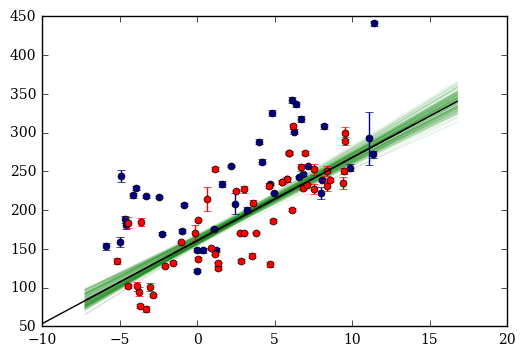

In [45]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="g", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')
plt.plot(x,popt2_tot_og[0] + popt2_tot_og[1]*x,'k')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [46]:
ints_late = []
ints_early = []
slopes_late = []
slopes_early = []
for i in range(1000):
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_late))
#     delta_EW = np.random.normal(loc=0, scale=err_late, size=len(EWs_late))
#     new_phases_late = phases_late + delta_phase
#     new_EWs_late = EWs_late + delta_EW
    
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_early))
#     delta_EW = np.random.normal(loc=0, scale=err_early, size=len(EWs_early))
#     new_phases_early = phases_early + delta_phase
#     new_EWs_early = EWs_early + delta_EW
    strap_list = np.random.random_sample(len(EWs_late_new))
    strap_list *= len(EWs_late_new)
    strap_list = strap_list.astype(int)
    new_phases_late = []
    new_EWs_late = []
    new_errs_late = []
    for i in strap_list:
        new_phases_late.append(phases_late_new[i])
        new_EWs_late.append(EWs_late_new[i])
        new_errs_late.append(err_late[i])
        
    strap_list = np.random.random_sample(len(EWs_early_new))
    strap_list *= len(EWs_early_new)
    strap_list = strap_list.astype(int)
    new_phases_early = []
    new_EWs_early = []
    new_errs_early = []
    for i in strap_list:
        new_phases_early.append(phases_early_new[i])
        new_EWs_early.append(EWs_early_new[i])
        new_errs_early.append(err_early[i])
    
    popt2_late, pcov2_late = curve_fit(lin, new_phases_late, new_EWs_late, p0=None, sigma=new_errs_late, absolute_sigma=True)
    popt2_early, pcov2_early = curve_fit(lin, new_phases_early, new_EWs_early, p0=None, sigma=new_errs_early, absolute_sigma=True)
    ints_late.append(popt2_late[0])
    ints_early.append(popt2_early[0])
    slopes_late.append(popt2_late[1])
    slopes_early.append(popt2_early[1])

In [47]:
int_late= np.percentile(ints_late, [32, 50, 68])
int_early= np.percentile(ints_early, [32, 50, 68])
print int_late
print int_early

int_sig_late = .5*((int_late[1] - int_late[0]) + (int_late[2] - int_late[1]))
int_sig_early = .5*((int_early[1] - int_early[0]) + (int_early[2] - int_early[1]))
print int_sig_late
print int_sig_early
# print sort_ints_late_low, sort_ints_late_up, sort_ints_early_low, sort_ints_early_up

[-15.56016117 -12.27268068  -8.79265965]
[-16.2726165  -13.78933538 -11.29390551]
3.38375076052
2.48935549478


In [48]:
slope_late= np.percentile(slopes_late, [32, 50, 68])
slope_early= np.percentile(slopes_early, [32, 50, 68])
print slope_late
print slope_early

slope_sig_late = .5*((slope_late[1] - slope_late[0]) + (slope_late[2] - slope_late[1]))
slope_sig_early = .5*((slope_early[1] - slope_early[0]) + (slope_early[2] - slope_early[1]))
print slope_sig_late
print slope_sig_early

[ 6.5192481   7.29293976  8.42485786]
[ 10.75339915  11.52961321  12.41943832]
0.952804880881
0.833019586711


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2005kc 1 limegreen 1.24
2002hw 1 darkblue 1.44
2007bd 4 limegreen 1.3
2005am 4 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 12 limegreen 1.23
2007ap 1 red 1.37
2006bq 2 red 1.29
1994d 11 red 1.37
2002dj 4 darkred 1.19
2008hv 4 red 1.13369017264
2004gs 1 red 1.41
2005w 1 red 1.22957865079
2005cf 9 red 1.1
2006ej 2 red 1.26659174257
1996x 5 darkred 1.26
1998dx 1 darkred 1.32
2005ki 1 red 1.41
2003ch 1 red 1.22
2006ef 1 red 1.20119166548
2005el 6 red 1.27
2002he 4 darkred 1.44


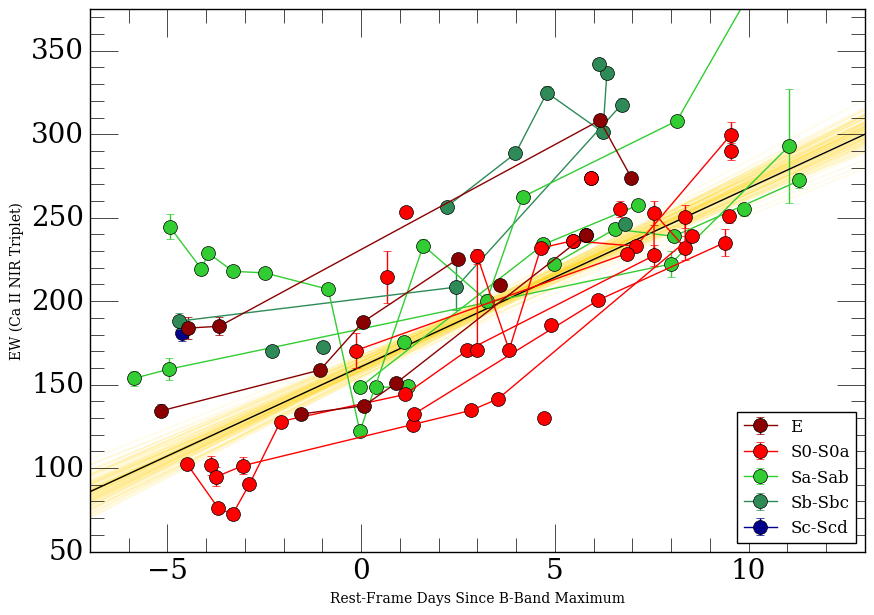

In [50]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')

E = []
S0_S0a = []

Sa_Sab = []
Sb_Sbc = []
Sc_Scd = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=11:
        Sa_Sab.append([resids,resid_errs])
        if len(Sa_Sab) == 1:
            lb = 'Sa-Sab'
        else:
            lb = ''
    elif 12<= morph <=13:
        Sb_Sbc.append([resids,resid_errs])
        if len(Sb_Sbc) == 1:
            lb = 'Sb-Sbc'
        else:
            lb = ''
    elif 14<= morph <=15:
        Sc_Scd.append([resids,resid_errs])
        if len(Sc_Scd) == 1:
            lb = 'Sc-Scd'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=7:
        E.append([resids,resid_errs])
        if len(E) == 1:
            lb = 'E'
        else:
            lb = ''
    elif 8<= morph <=9:
        S0_S0a.append([resids,resid_errs])
        if len(S0_S0a) == 1:
            lb = 'S0-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1)
plt.xlim(-7,13)
plt.ylim(50,375)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [51]:
E_avgs = []
E_errs = []
for i, e in enumerate(E):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    E_avgs.append(avg)
    E_errs.append(err)
    print avg, err
print 

S0_S0a_avgs = []
S0_S0a_errs = []
for i, e in enumerate(S0_S0a):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    S0_S0a_avgs.append(avg)
    S0_S0a_errs.append(err)
    print avg, err
print 

Sa_Sab_avgs = []
Sa_Sab_errs = []
for i, e in enumerate(Sa_Sab):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sa_Sab_avgs.append(avg)
    Sa_Sab_errs.append(err)
    print avg, err
print 

Sb_Sbc_avgs = []
Sb_Sbc_errs = []
for i, e in enumerate(Sb_Sbc):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sb_Sbc_avgs.append(avg)
    Sb_Sbc_errs.append(err)
    print avg, err
print 

Sc_Scd_avgs = []
Sc_Scd_errs = []
for i, e in enumerate(Sc_Scd):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sc_Scd_avgs.append(avg)
    Sc_Scd_errs.append(err)
    print avg, err

63.5960744866 4.4935168882
-4.34708467535 2.69989622577
10.7817008661 5.2313071792
25.5153048713 3.61157740806

-11.5009379933 9.18053214867
49.5464095785 4.056262536
-20.7825359524 2.57435251309
-36.0673765187 3.70497921032
80.2002667719 5.6091382257
46.5770283535 16.4452395151
10.6599095509 2.34961135825
2.74877092981 6.87237239586
23.015960988 7.65849350065
-81.1190897519 5.62697758616
-27.4623311071 5.64743491083
-32.8496758159 3.4291441397

3.12775166889 5.31971236542
-11.5640571429 9.68071694582
24.3353814664 10.1607223909
0.640347944958 3.8838272381
-20.7405484275 4.2938517252
10.345584624 3.51449660629
73.0754633508 2.37596389968

22.275967015 6.7454627749
12.5336427563 6.35949902623
90.2943509087 2.6346190945
33.8018880857 7.55506713841
61.2783892336 6.42013205726
115.691690508 6.60571224086

69.4390346358 10.5803648997


In [52]:
print 'E:', np.average(E_avgs), np.sqrt(np.sum(np.asarray(E_errs)**2.))/len(E_avgs)
print 'S0_S0a:', np.average(S0_S0a_avgs), np.sqrt(np.sum(np.asarray(S0_S0a_errs)**2.))/len(S0_S0a_avgs)
print 'Sa_Sab:', np.average(Sa_Sab_avgs), np.sqrt(np.sum(np.asarray(Sa_Sab_errs)**2.))/len(Sa_Sab_avgs)
print 'Sb_Sbc:', np.average(Sb_Sbc_avgs), np.sqrt(np.sum(np.asarray(Sb_Sbc_errs)**2.))/len(Sb_Sbc_avgs)
print 'Sc_Scd:', np.average(Sc_Scd_avgs), np.sqrt(np.sum(np.asarray(Sc_Scd_errs)**2.))/len(Sc_Scd_avgs)

E: 23.8864988872 2.05990290779
S0_S0a: 0.247199919447 2.05770243096
Sa_Sab: 11.3171319264 2.37664687151
Sb_Sbc: 55.9793214179 2.55396360255
Sc_Scd: 69.4390346358 10.5803648997


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2005kc 1 limegreen 1.24
2002hw 1 darkblue 1.44
2007bd 4 limegreen 1.3
2005am 4 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 12 limegreen 1.23
2007ap 1 red 1.37
2006bq 2 red 1.29
1994d 11 red 1.37
2002dj 4 darkred 1.19
2008hv 4 red 1.13369017264
2004gs 1 red 1.41
2005w 1 red 1.22957865079
2005cf 9 red 1.1
2006ej 2 red 1.26659174257
1996x 5 darkred 1.26
1998dx 1 darkred 1.32
2005ki 1 red 1.41
2003ch 1 red 1.22
2006ef 1 red 1.20119166548
2005el 6 red 1.27
2002he 4 darkred 1.44


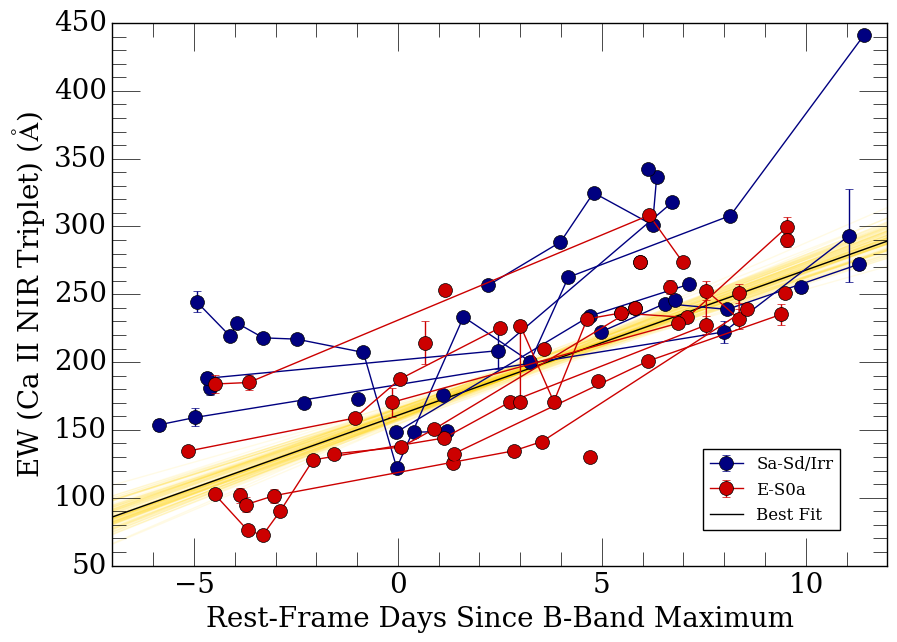

In [59]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum", fontsize=20)
plt.ylabel("EW (Ca II NIR Triplet) ($\mathrm{\AA}$)", fontsize=20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k', label='Best Fit')

late_resids = []
early_resids = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=18:
        late_resids.append([resids,resid_errs])
        if len(late_resids) == 1:
            lb = 'Sa-Sd/Irr'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#000080', label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=9:
        early_resids.append([resids,resid_errs])
        if len(early_resids) == 1:
            lb = 'E-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#cc0000', label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1, bbox_to_anchor=(0.5, 0.05, 0.45, 0.5))
plt.xlim(-7,12)
plt.ylim(50,450)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_2bins.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [60]:
early_avgs = []
early_errs = []
for i, e in enumerate(early_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    early_avgs.append(avg)
    early_errs.append(err)
    print avg, err
print 

late_avgs = []
late_errs = []
for i, e in enumerate(late_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    late_avgs.append(avg)
    late_errs.append(err)
    print avg, err
print 

-11.5009379933 9.18053214867
49.5464095785 4.056262536
-20.7825359524 2.57435251309
63.5960744866 4.4935168882
-36.0673765187 3.70497921032
80.2002667719 5.6091382257
46.5770283535 16.4452395151
10.6599095509 2.34961135825
2.74877092981 6.87237239586
-4.34708467535 2.69989622577
10.7817008661 5.2313071792
23.015960988 7.65849350065
-81.1190897519 5.62697758616
-27.4623311071 5.64743491083
-32.8496758159 3.4291441397
25.5153048713 3.61157740806

22.275967015 6.7454627749
3.12775166889 5.31971236542
-11.5640571429 9.68071694582
69.4390346358 10.5803648997
24.3353814664 10.1607223909
0.640347944958 3.8838272381
12.5336427563 6.35949902623
90.2943509087 2.6346190945
33.8018880857 7.55506713841
-20.7405484275 4.2938517252
61.2783892336 6.42013205726
10.345584624 3.51449660629
115.691690508 6.60571224086
73.0754633508 2.37596389968



In [61]:
print 'E-S0a:', np.average(late_avgs), np.std(late_avgs), np.sqrt(np.sum(np.asarray(late_errs)**2.))/len(late_avgs)
print 'Sa-Scd:', np.average(early_avgs), np.std(early_avgs), np.sqrt(np.sum(np.asarray(early_errs)**2.))/len(early_avgs)
print (np.average(late_avgs) - np.average(early_avgs))/np.sqrt((np.std(late_avgs)**2) + np.std(early_avgs)**2)

E-S0a: 34.6096347591 39.4191003076 1.78362230553
Sa-Scd: 6.15702466138 40.4737507237 1.62693065385
0.503606531158


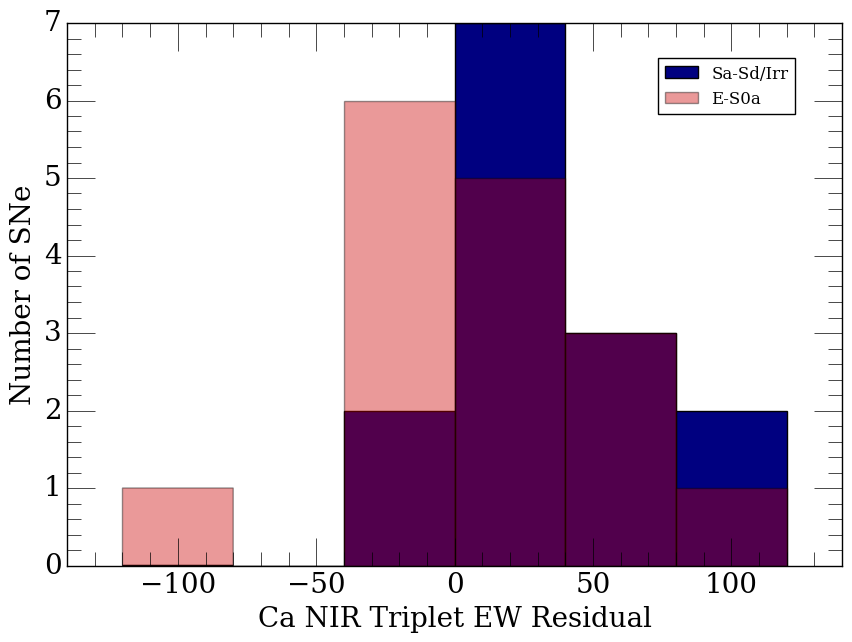

In [62]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Ca NIR Triplet EW Residual", fontsize = 20)
plt.ylabel("Number of SNe", fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.hist(late_avgs, color = '#000080', bins=range(-120, 140, 40), label='Sa-Sd/Irr')
plt.hist(early_avgs, color = '#cc0000', alpha=.4, bins=range(-120, 140, 40), label='E-S0a')
plt.legend(loc=1, bbox_to_anchor=(0.5, 0.45, 0.45, 0.5))
plt.ylim(0,7)
plt.xlim(-140,140)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_hist.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [63]:
from scipy import stats
stats.ks_2samp(early_avgs, late_avgs)

Ks_2sampResult(statistic=0.3125, pvalue=0.38724177210820798)

In [189]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    inv_sigma2 = 1.0/(yerr**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

# def lnlike_const_slope(theta, x, y, yerr, m):
#     b, lnf = theta
#     model = m*x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
# #     inv_sigma2 = 1.0/(yerr**2)
#     return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [190]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
nll_c = lambda *args: -lnlike_const_slope(*args)
result_late = op.minimize(nll, [10,0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
m_ml_late, b_ml_late, lnf_ml_late = result_late["x"]
print m_ml_late, b_ml_late, np.exp(lnf_ml_late)

result_early = op.minimize(nll, [10, 0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))
m_ml_early, b_ml_early, lnf_ml_early = result_early["x"]
print m_ml_early, b_ml_early, np.exp(lnf_ml_early)

# print

#const slope
# m_c = 7
# result_late_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late), m_c))
# b_ml_late_c, lnf_ml_late_c = result_late_c["x"]
# print b_ml_late_c, np.exp(lnf_ml_late_c)

# result_early_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early), m_c))
# b_ml_early_c, lnf_ml_early_c = result_early_c["x"]
# print b_ml_early_c, np.exp(lnf_ml_early_c)

8.04830325198 -9.5927893824 1.6487212707
11.1033951541 -52.4067824055 1.6487212707


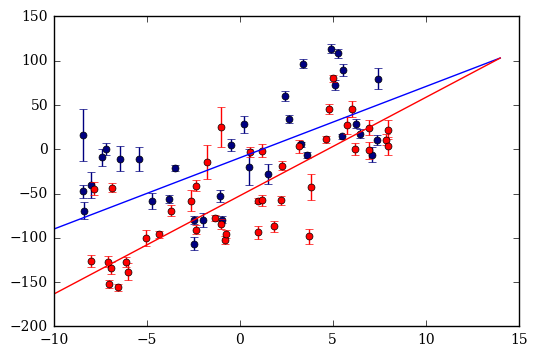

In [191]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
plt.plot(x,m_ml_late*x + b_ml_late,'b')
plt.plot(x,m_ml_early*x + b_ml_early,'r')

# plt.plot(x,m_c*x + b_ml_late_c,'b')
# plt.plot(x,m_c*x + b_ml_early_c,'r')

# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + slope*x, sort_ints_late_up + slope*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + slope*x, sort_ints_early_up + slope*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [192]:
import emcee
def lnprior(theta):
    m, b, lnf = theta
#     if 0.0 < m < 20. and 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
    if 0.0 < m < 20. and -100.0 < b < 100.0 and -10.0 < lnf < 2.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

# def lnprior_c(theta):
#     b, lnf = theta
#     #7.01263387516
#     if 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
# #     if 7.01 < m < 7.02 and 0.0 < b < 300.0 and -10.0 < lnf < 1.0:
# #         return 0.0
#     return -np.inf

# def lnprob_c(theta, x, y, yerr, m):
#     lp = lnprior_c(theta)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + lnlike_const_slope(theta, x, y, yerr, m)

In [193]:
ndim, nwalkers = 3, 100
pos_late = [result_late["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
pos_early = [result_early["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# ndim_c, nwalkers = 2, 100
# pos_late_c = [result_late_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]
# pos_early_c = [result_early_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]

In [194]:
sampler_late = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
sampler_early = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))

sampler_late.run_mcmc(pos_late, 500)
sampler_early.run_mcmc(pos_early, 500)


# sampler_late_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_late_new), np.asarray(EWs_late), np.asarray(err_late), m_c))
# sampler_early_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_early_new), np.asarray(EWs_early), np.asarray(err_early), m_c))

# sampler_late_c.run_mcmc(pos_late_c, 500)
# sampler_early_c.run_mcmc(pos_early_c, 500)

(array([[ 11.20879213, -51.42790167,  -6.13298628],
        [ 10.44471956, -51.9278892 ,  -0.91558056],
        [ 11.49563149, -53.36764746,  -5.09890265],
        [ 11.28521062, -53.18544853,   1.642969  ],
        [ 10.53392133, -49.18153494,  -0.96080424],
        [ 10.55512847, -53.75261877,  -3.46187951],
        [ 11.4755828 , -52.1392925 ,  -9.34354234],
        [ 10.52777088, -52.62984717,  -1.42479546],
        [ 10.33022838, -54.26587056,   1.80308445],
        [ 11.08523918, -53.20814085,  -7.90619969],
        [ 10.8957014 , -55.24934281,  -0.32142322],
        [ 11.3841625 , -51.52165404,  -2.52220801],
        [ 10.98617871, -52.64544612,  -8.99452124],
        [ 11.47623005, -55.51009293,  -5.37887121],
        [ 11.00223076, -47.72638195,   1.38155866],
        [ 10.46504951, -53.33038474,  -8.72559096],
        [ 10.59738517, -51.16382929,   1.57216293],
        [ 10.82908988, -52.5172777 ,  -4.17099394],
        [ 11.40451113, -55.12873041,  -7.00758483],
        [ 11

In [195]:
samples_late = sampler_late.chain[:, 50:, :].reshape((-1, ndim))
samples_early = sampler_early.chain[:, 50:, :].reshape((-1, ndim))

samples_late[:, 2] = np.exp(samples_late[:, 2])
m_mcmc_late, b_mcmc_late, f_mcmc_late = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_late, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_late, b_mcmc_late, f_mcmc_late

samples_early[:, 2] = np.exp(samples_early[:, 2])
m_mcmc_early, b_mcmc_early, f_mcmc_early = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_early, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_early, b_mcmc_early, f_mcmc_early

# print
# #constant slope
# samples_late_c = sampler_late_c.chain[:, 50:, :].reshape((-1, ndim_c))
# samples_early_c = sampler_early_c.chain[:, 50:, :].reshape((-1, ndim_c))

# samples_late_c[:, 1] = np.exp(samples_late_c[:, 1])
# b_mcmc_late_c, f_mcmc_late_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                             zip(*np.percentile(samples_late_c, [32, 50, 68],
#                                             axis=0)))
# print b_mcmc_late_c, f_mcmc_late_c

# samples_early_c[:, 1] = np.exp(samples_early_c[:, 1])
# b_mcmc_early_c, f_mcmc_early_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                                          zip(*np.percentile(samples_early_c, [32, 50, 68],
#                                                             axis=0)))
# print b_mcmc_early_c, f_mcmc_early_c

(8.0170011460049171, 0.33680698054835467, 0.34604674490826692) (-9.6730243027198117, 1.4371665922362755, 1.4169836130758338) (0.026422663857862051, 0.19743985076135298, 0.023787141301235638)
(11.083739028422519, 0.28314289912121815, 0.28816487639262434) (-52.337117754447547, 1.3125554888637794, 1.2769214413620347) (0.013628810415147293, 0.10875989462916313, 0.011813847345701114)


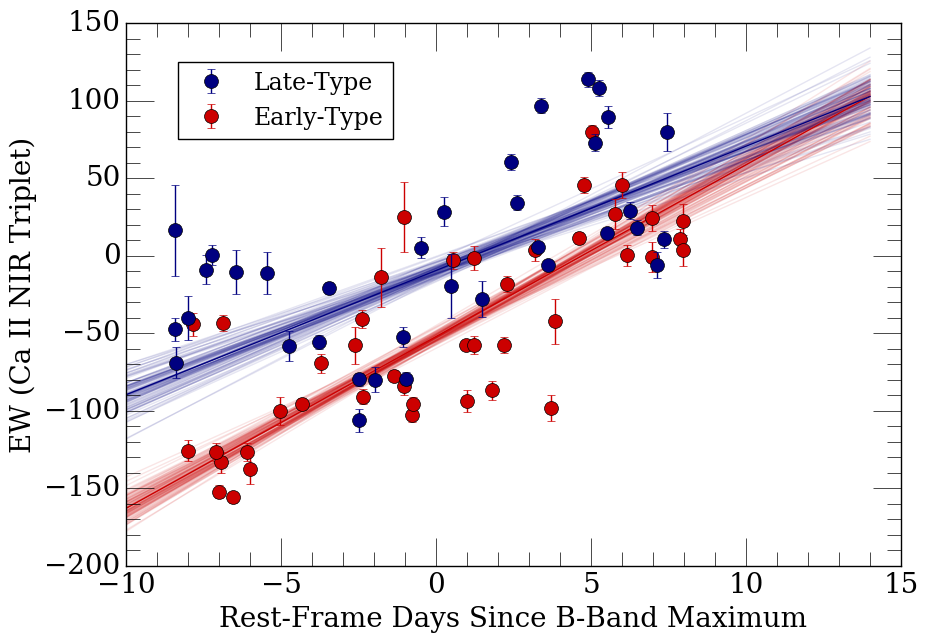

In [196]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for m, b, lnf in samples_late[np.random.randint(len(samples_late), size=100)]:
    plt.plot(x, m*x+b, color="#000080", alpha=0.1, zorder=-1)
for m, b, lnf in samples_early[np.random.randint(len(samples_early), size=100)]:
    plt.plot(x, m*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_mcmc_late[0]*x + b_mcmc_late[0],'#000080', zorder=-.5)
plt.plot(x,m_mcmc_early[0]*x + b_mcmc_early[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

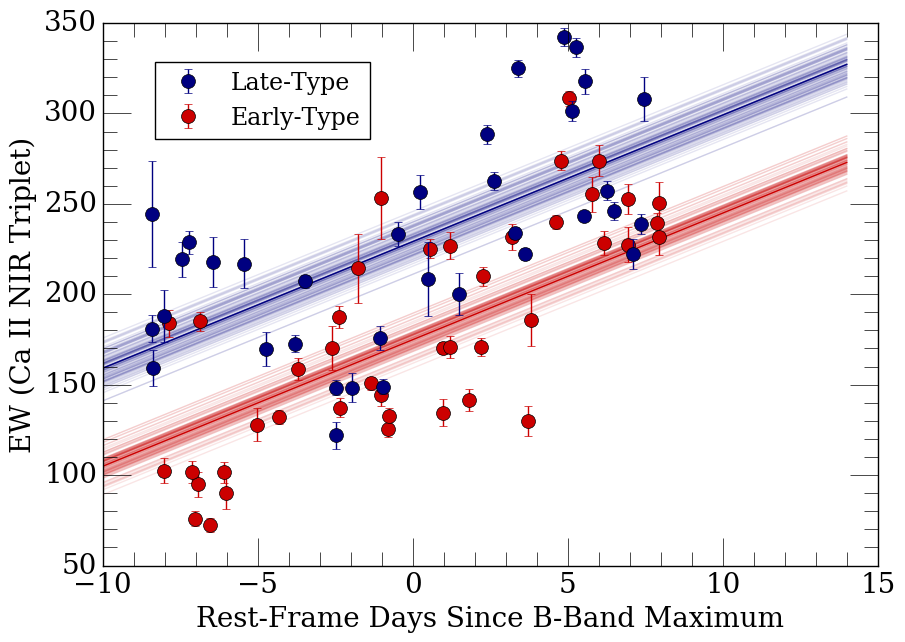

In [119]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for b, lnf in samples_late_c[np.random.randint(len(samples_late_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#000080", alpha=0.1, zorder=-1)
for b, lnf in samples_early_c[np.random.randint(len(samples_early_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_c*x + b_mcmc_late_c[0],'#000080', zorder=-.5)
plt.plot(x,m_c*x + b_mcmc_early_c[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Max-High dm15 Matched

In [14]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [15]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
4 questionable spectra removed 54 spectra left
5 Peculiar Ias removed 49 spectra left
39 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm

-0.162779726842
1.34276533441
0.344992531562
1.34267830931


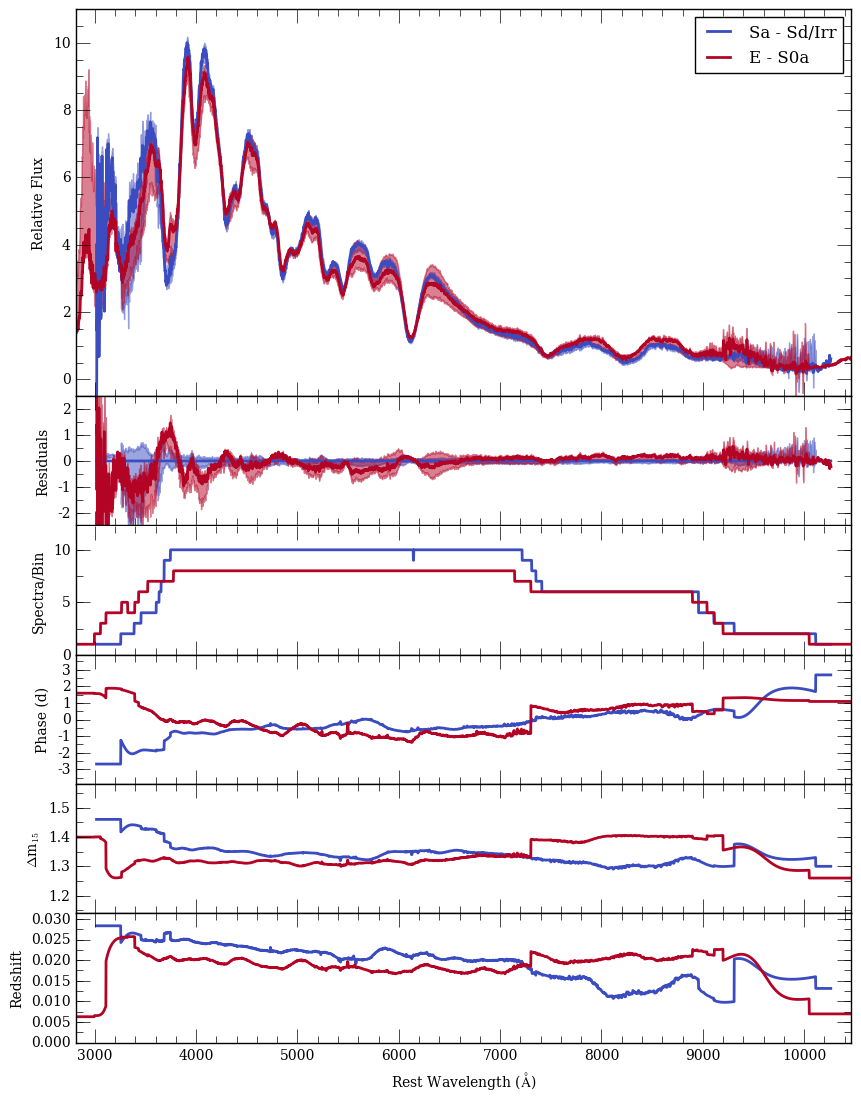

In [16]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [17]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [18]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
1 questionable spectra removed 29 spectra left
0 Peculiar Ias removed 29 spectra left
26 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
17 spectra may have telluric contamination
17 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
0 questionable spectra removed 11 spectra left
0 Peculia

6.32394186246
1.02985627134
6.83483977494
1.06079003646


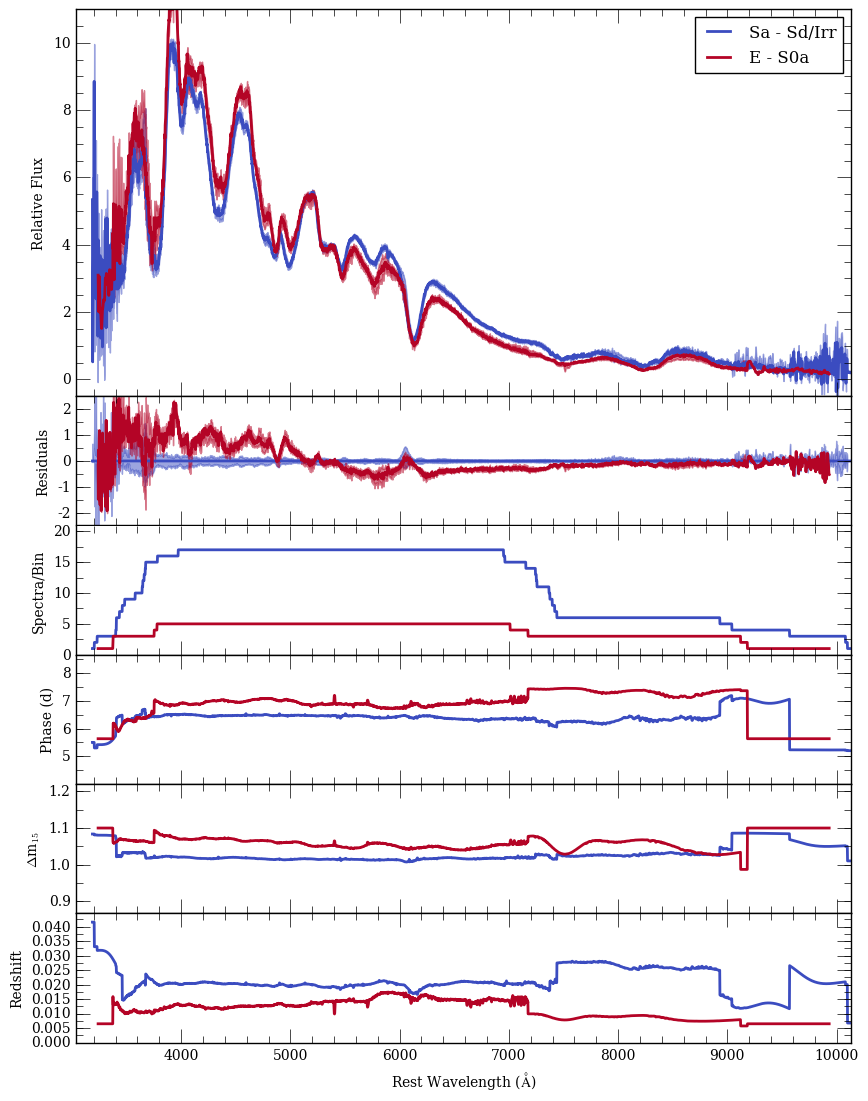

In [19]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [20]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [21]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 26 spectra left
0 Peculiar Ias removed 26 spectra left
21 spectra with host corrections
172 questionable files currently ignored
8 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
8 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionable fi

6.92800519464
1.36045603157
7.58052346057
1.38911758851


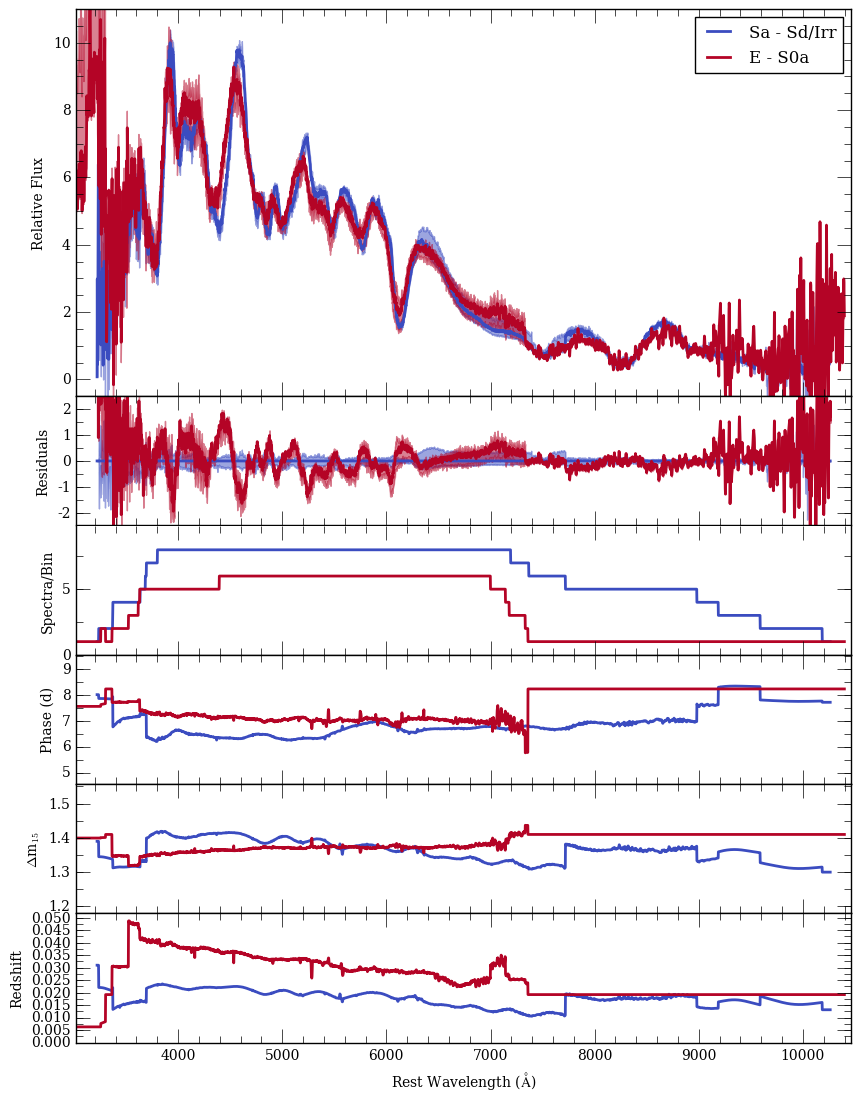

In [22]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [23]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [24]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
2 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
46 spectra with host corrections
172 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603

-6.80056333422
1.03873962341
-6.46939975844
1.01990214877


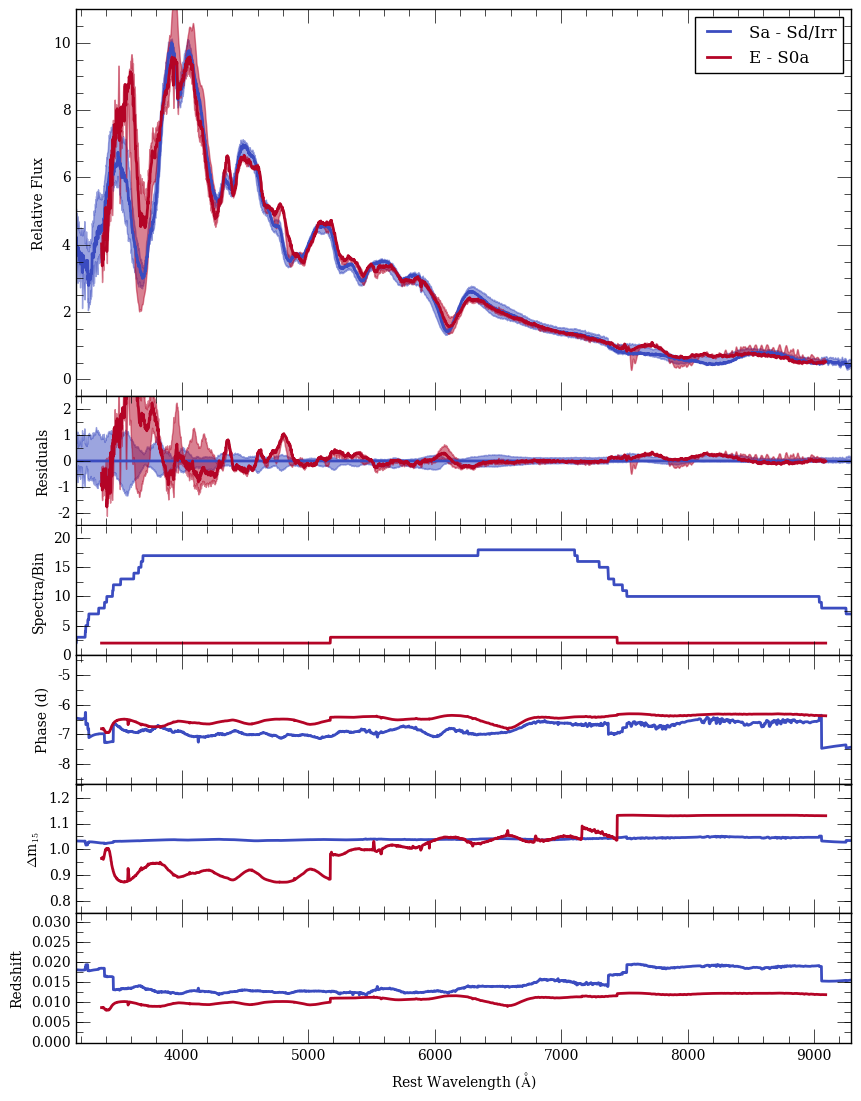

In [25]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_m1week')

In [26]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [27]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
172 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
9 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionabl

-5.82422884136
1.41953586444
-5.81620661784
1.41581278456


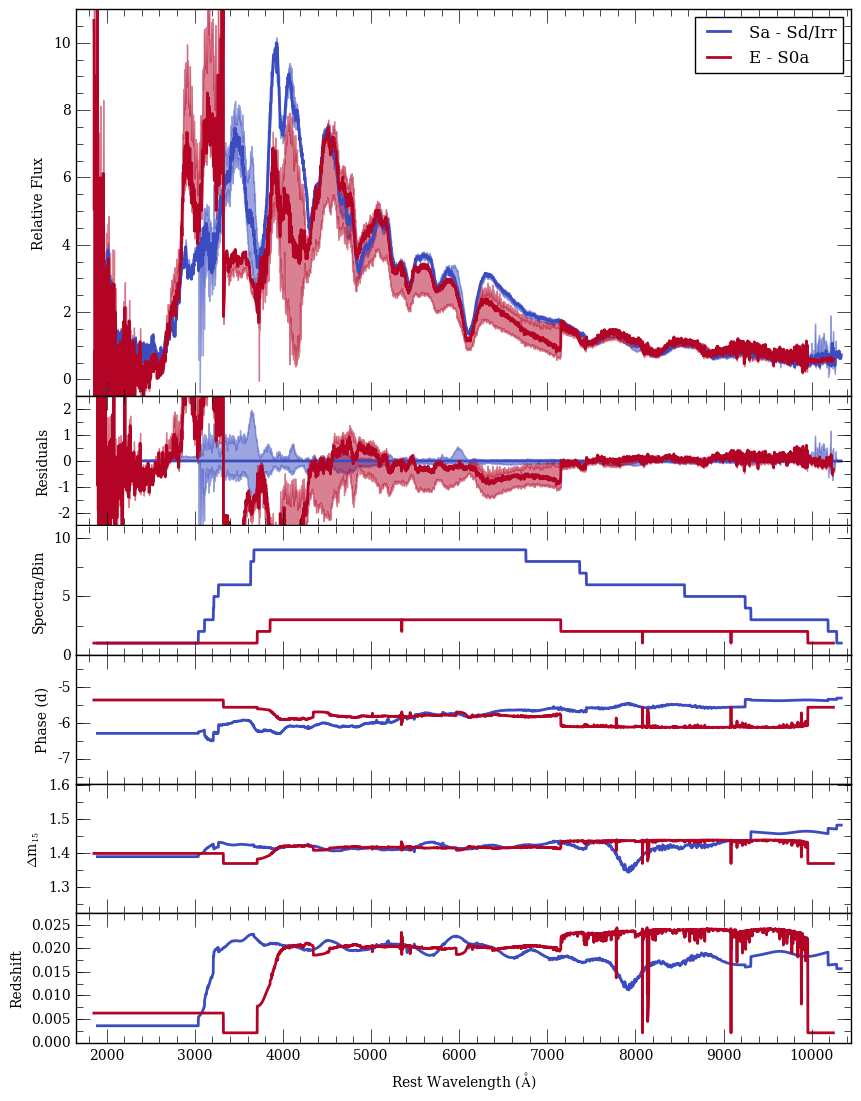

In [29]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_m1week')